# data, preprocessing, encoding

> Ïó¨Îü¨ Ï¢ÖÎ•òÏùò dataÎ•º readÌïòÎäî Î∞©Î≤ï, Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Î∞©Î≤ï Îì± Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú Í∏∞Î≥∏Ïù¥ ÎêòÎäî Í∏∞Ïà†Îì§Ïóê ÎåÄÌï¥ Î∞∞ÏõåÎ≥¥Îäî ÏãúÍ∞ÑÏù¥ÏóàÏúºÎ©¥ Ï¢ãÍ≤†ÏäµÎãàÎã§. Îçî ÎÇòÏïÑÍ∞Ä ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÏãúÎ©¥ Ï¢ãÏùÑ Í±∞ Í∞ôÏäµÎãàÎã§.

## ÌôòÍ≤Ω ÏÑ§Ï†ï [üòâ Ïù¥ ÏΩîÎìúÎäî Î∞òÎìúÏãú Ïã§ÌñâÌïòÏÑ∏Ïöî! üòâ]
> ÎßåÏïΩ Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏(Google Drive Mount)Í∞Ä ÏïàÎêòÏñ¥ÏûàÎã§Î©¥ Íº≠ ÎßàÏö¥Ìä∏Î•º ÌïòÍ≥†ÎÇòÏÑú ÏßÑÌñâÌïúÎã§!
- Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
- **Ïã§ÏäµÏùÑ ÏúÑÌïú Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï** <- üòÑ Î∞òÎìúÏãú Ïù¥ ÌååÏùºÏù¥ ÏúÑÏπòÌïú Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî!!! üòÑ
- Ïã§Ïäµ ÏûêÎ£å iris Îç∞Ïù¥ÌÑ∞ÎÑ∑ Îã§Ïö¥Î°úÎìú

ÌôòÍ≤Ω ÏÑ§Ï†ï Ïù¥ÌõÑ MLÌååÏù¥ÌîÑÎùºÏù∏Ïùò ÏõêÌïòÎäî Îã®Í≥ÑÎ°ú Í∞ÄÏÑú ÏΩîÎìúÎ•º Ïã§ÌñâÌïúÎã§. Í∞Å Îã®Í≥ÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Í¥ÄÎ†®Îêú ÏΩîÎìúÍ∞Ä Îß® Ï≤òÏùå ÏúÑÏπòÌïòÍ≥† ÏûàÎã§Î©¥ Íº≠ Ïã§ÌñâÌï¥Ï£ºÏûê.



### A. Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏

In [4]:
!pip install -q -U PyYAML
!pip install -q -U scikit-learn
!pip install -q shap eli5 cairosvg jupyter_contrib_nbextensions pip install category_encoders
!pip install cairosvg

In [5]:
import os
import gc
import time
import itertools
import random

from collections import OrderedDict, defaultdict
from abc import *

# ÏÑ§Ï†ï
from datetime import datetime

import yaml
import glob
import shutil

# Log
import logging

# I/O
from cairosvg import svg2png
from PIL import Image
from io import BytesIO
from tqdm import tqdm

# Í≥µÌïôÏö© Ïó∞ÏÇ∞
import numpy as np
import pandas as pd

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import pprint
pp = pprint.PrettyPrinter(indent=1)

# Î®∏Ïã†Îü¨Îãù
import lightgbm as lgb

# Îî•Îü¨Îãù
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torch.nn.functional as F

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': libcairo.so.2: cannot open shared object file: No such file or directory.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': libcairo.2.dylib: cannot open shared object file: No such file or directory.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': libcairo-2.dll: cannot open shared object file: No such file or directory.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

In [ ]:
import warnings

# warningÏùÑ Î≥¥Í≥† Ïã∂ÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ ÏïÑÎûò ÏΩîÎìú ÌôúÏÑ±Ìôî
# warnings.filterwarnings('ignore')

### B. Ïã§ÏäµÏùÑ ÏúÑÌïú Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï <- üòÑ Î∞òÎìúÏãú Ïù¥ ÌååÏùºÏù¥ ÏúÑÏπòÌïú Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî!!! üòÑ

In [ ]:
# Ïù¥ Ïã§Ïäµ ÌååÏùºÏù¥ ÏúÑÏπòÌïòÍ≥† ÏûàÎäî Í≤ΩÎ°ú!
# üòÑ Î∞òÎìúÏãú Ïù¥ ÌååÏùºÏù¥ ÏúÑÏπòÌïú Í≤ΩÎ°úÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî!!! üòÑ
PROJECT_PATH = "/data/ephemeral/home/level2-dkt-recsys-06/code/"

In [ ]:
# Ïã§ÏäµÏùÑ ÏúÑÌïú data Ìè¥Îçî ÏÉùÏÑ±
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
if not os.path.isdir(DATA_PATH):
    os.mkdir(DATA_PATH)

### C. Ïã§Ïäµ ÏûêÎ£å iris Îç∞Ïù¥ÌÑ∞ÎÑ∑ Îã§Ïö¥Î°úÎìú

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# iris pandas DataFrame Ï†úÏûë!
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["class"] = pd.Categorical.from_codes(iris.target, ['Iris-' + name for name in list(iris.target_names)])

# Îí§Ïóê Ï†ÄÏû•Îêú csvÎ•º ÌôúÏö©ÌïòÎäî ÏΩîÎìúÎì§Í≥ºÏùò Ìò∏ÌôòÏÑ±ÏùÑ ÏúÑÌï¥ Ï†ÄÏû•!
iris_df.to_csv(os.path.join(DATA_PATH, 'iris.csv'), index=False)

iris_df.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
69                 5.6               2.5                3.9               1.1   
1                  4.9               3.0                1.4               0.2   
139                6.9               3.1                5.4               2.1   
58                 6.6               2.9                4.6               1.3   
117                7.7               3.8                6.7               2.2   

               class  
69   Iris-versicolor  
1        Iris-setosa  
139   Iris-virginica  
58   Iris-versicolor  
117   Iris-virginica

## üìö Îç∞Ïù¥ÌÑ∞ (Data)

- Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú (Download Dataset)
- Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûë (Make Dataset)
- Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï (Compress Data)
- Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (Save Data)
- Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞ (Read Data)
- Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞ (Split Data)



### üìó Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú (Download Dataset)

> Î®∏Ïã†Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏ÏóêÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌïÑÏàòÏù¥Îã§. Ïù¥ÎØ∏ ÎßåÎì§Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ Ïù¥Î•º Îã§Ïö¥Î°úÎìú ÌïòÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏÇ¥Ìé¥Î≥¥Ïûê

1. ÌôàÌéòÏù¥ÏßÄÏóêÏÑú ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏÉâ ÌõÑ Îã§Ïö¥Î°úÎìú Î∞õÍ∏∞
2. ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞õÍ∏∞
3. ML ÎùºÏù¥Î∏åÎü¨Î¶¨ Îç∞Ïù¥ÌÑ∞ÏÖã Ìå®ÌÇ§ÏßÄ ÌôúÏö©

#### 1. ÌôàÌéòÏù¥ÏßÄÏóêÏÑú ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏÉâ ÌõÑ Îã§Ïö¥Î°úÎìú Î∞õÍ∏∞

> Í∞ÄÏû• Í∞ÑÎã®Ìïú Î∞©Î≤ïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÖÎ°úÎìúÎêòÏñ¥ ÏûàÎäî ÏÇ¨Ïù¥Ìä∏Î°ú Í∞ÄÏÑú ÏõêÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï∞æÏïÑÎÇ∏ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ GUI(Í∑∏ÎûòÌîΩ Ïù∏ÌÑ∞ÌéòÏù¥Ïä§)Î•º Ïù¥Ïö©ÌïòÏó¨ Îã§Ïö¥Î°úÎìú Î∞õÎäîÎã§

- [Google Dataset Search](https://datasetsearch.research.google.com/)
- [UCI Machine Learing Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [CMU Machine Learning and AI: Find Datasets](https://guides.library.cmu.edu/machine-learning/datasets)
- [AWS open dataset](https://registry.opendata.aws/)

#### 2. ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞õÍ∏∞
- python `requests` ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôúÏö©

##### python `requests` ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôúÏö©

> Îç∞Ïù¥ÌÑ∞ÏÖãÏùò urlÏùÑ ÏïåÍ≥† ÏûàÏùÑ Í≤ΩÏö∞ ÏΩîÎìúÎ•º Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìú Î∞õÏùÑ Ïàò ÏûàÎã§

- [Request Quickstart](https://requests.readthedocs.io/en/master/user/quickstart/)

In [ ]:
import requests

iris_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_name_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names'

def download_url(url, path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)

# iris Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú ÌõÑ Ï†ÄÏû•
iris_data_path = os.path.join(DATA_PATH, 'iris.data')
iris_name_path = os.path.join(DATA_PATH, 'iris.names')

download_url(iris_data_url, iris_data_path)
download_url(iris_name_url, iris_name_path)

# iris names Ï†ïÎ≥¥ÏóêÏÑú columnÎ™Ö ÌååÏïÖÌïòÍ∏∞
with open(iris_name_path, 'rb') as f:
    iris_name = f.read().decode('utf8')

print('\n'.join(iris_name.split('\n')[49:58]))

# iris data columnÎ™Ö Ï∂îÍ∞ÄÌïòÏó¨ ÏùΩÏñ¥Ïò§Í∏∞
iris_df = pd.read_csv(iris_data_path,
                      header=None,
                      names=['sepal length (cm)',
                              'sepal width (cm)',
                              'petal length (cm)',
                              'petal width (cm)',
                              'class'])
iris_df.sample(5)

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
12                4.8               3.0                1.4               0.1   
36                5.5               3.5                1.3               0.2   
56                6.3               3.3                4.7               1.6   
28                5.2               3.4                1.4               0.2   
76                6.8               2.8                4.8               1.4   

              class  
12      Iris-setosa  
36      Iris-setosa  
56  Iris-versicolor  
28      Iris-setosa  
76  Iris-versicolor

#### 3. ML ÎùºÏù¥Î∏åÎü¨Î¶¨ Îç∞Ïù¥ÌÑ∞ÏÖã Ìå®ÌÇ§ÏßÄ ÌôúÏö©

> Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏâΩÍ≤å Îã§Ïö¥Î°úÎìú Î∞õÏùÑ Ïàò ÏûàÎäî ÏÑúÎ∏å Ìå®ÌÇ§ÏßÄ

- ##### [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

##### sklearn.datasets
> ÏúÑÏóêÏÑú `requests`Î•º Ïù¥Ïö©ÌïòÏó¨ÏÑú Îã§Ïö¥Î°úÎìúÌïòÏòÄÎçò iris Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏâΩÍ≤å Îã§Ïö¥Î°úÎìú Ìï† Ïàò ÏûàÎã§

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["class"] = pd.Categorical.from_codes(iris.target, ['Iris-' + name for name in list(iris.target_names)])

df.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
106                4.9               2.5                4.5               1.7   
148                6.2               3.4                5.4               2.3   
67                 5.8               2.7                4.1               1.0   
147                6.5               3.0                5.2               2.0   
7                  5.0               3.4                1.5               0.2   

               class  
106   Iris-virginica  
148   Iris-virginica  
67   Iris-versicolor  
147   Iris-virginica  
7        Iris-setosa

### üìó Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûë (Make Dataset)

> ÎßåÏïΩ ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏóÜÎã§Î©¥ ÏßÅÏ†ë Ï†úÏûëÌïòÏó¨Ïïº ÌïúÎã§.

1. ÏõπÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ (Webpage Crawling)
2. API (Application Programming Interface)
3. Îç∞Ïù¥ÌÑ∞ÏÖã Ìï©ÏπòÍ∏∞ (Merging Dataset)
4. ÎùºÎ≤®ÎßÅ (Labeling)

#### 1. ÏõπÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ (Webpage Crawling)
- [selenium Í≥µÏãùÎ¨∏ÏÑú](https://selenium-python.readthedocs.io/)
- [BeautifulSoup Í≥µÏãùÎ¨∏ÏÑú](https://beautiful-soup-4.readthedocs.io/en/latest/)

##### selenium

> Îß§Ïö∞ Í∞ïÎ†•ÌïòÍ≥† Ïú†Î™ÖÌïú ÌÅ¨Î°§Îü¨Î°ú ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏Î°ú ÎèôÏûëÌïòÎäî ÎèôÏ†Å ÏõπÌéòÏù¥ÏßÄÏóêÏÑú ÏÜêÏâΩÍ≤å Ï†ïÎ≥¥Î•º ÌÅ¨Î°§ÎßÅ Ìï† Ïàò ÏûàÎã§. Íµ¨Í∏ÄÏóê ÌôúÏö© Î∞©Î≤ïÏóê ÎåÄÌïú Îß§Ïö∞ ÎßéÏùÄ Ï†ïÎ≥¥Í∞Ä ÏûàÎã§.

![selenium](https://selenium-python.readthedocs.io/_static/logo.png)

##### BeautifulSoup

> HTMLÍ≥º XMLÌòïÏãùÏùò ÏõπÌéòÏù¥ÏßÄÏóêÏÑú Ï†ïÎ≥¥Î•º ÌÅ¨Î°§ÎßÅÌïòÎäî ÌååÏù¥Ïç¨ ÎùºÏù¥Î∏åÎü¨Î¶¨Îã§. Í∞ÄÏû• Í∏∞Ï¥àÏ†ÅÏù¥Î©∞ Í∞ÄÎ≥çÏßÄÎßå ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ Í∏∞Î∞ò ÎèôÏ†Å ÏõπÌéòÏù¥ÏßÄÏóêÏÑúÏùò ÌÅ¨Î°§ÎßÅÏùÄ Selenium ÏÇ¨Ïö©ÏùÑ Ï†ÅÍ∑π Í∂åÏû•ÌïúÎã§

![BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/_images/6.1.jpg)



#### 2. API (Application Programming Interface)

> ÎßéÏùÄ ÏõπÌéòÏù¥ÏßÄÎì§Ïù¥ ÏûêÏã†Îì§Ïùò Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌïòÎäî APIÎ•º ÏßÄÏõêÌïúÎã§. Ïù¥Î•º ÌôúÏö©ÌïúÎã§Î©¥ ÌÅ¨Î°§ÎßÅ ÏóÜÏù¥ Ï†ïÎ≥¥Î•º ÏÜêÏâΩÍ≤å ÏñªÏùÑ Ïàò ÏûàÎã§.

API ÏòàÏãú
- [youtube API](https://developers.google.com/youtube/)
- [facebook API](https://developers.facebook.com/)
- [wikipedia API](https://www.mediawiki.org/wiki/API:Main_page)

#### 3. Îç∞Ïù¥ÌÑ∞ÏÖã Ìï©ÏπòÍ∏∞ (Merging Dataset)

> Ï†úÏûëÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ïÎ≥¥Í∞Ä Ïù∏ÌÑ∞ÎÑ∑ ÏÉÅÏóêÎäî Ï°¥Ïû¨ÌïòÏßÄÎßå Ïó¨Í∏∞Ï†ÄÍ∏∞ Ìù©Ïñ¥Ï†∏ÏûàÎäî Í≤ΩÏö∞ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÎì§ÏùÑ Î™®ÏïÑÏÑú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨Ï∂ïÌï† ÏàòÎèÑ ÏûàÎã§. ÏùºÎ∂Ä Ï†ïÎ≥¥Í∞Ä ÎàÑÎùΩÎêú Í≤ΩÏö∞ ÏúÑÏùò 2Í∞ÄÏßÄ Î∞©Î≤ïÏùÑ ÌÜµÌï¥ Ìï¥Îãπ ÎàÑÎùΩÎêú Ï†ïÎ≥¥Î•º Î™®ÏïÑÏÑú ÎÇòÎ®∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÎì§Í≥º Ìï©Ï≥ê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ ÏàòÎèÑ ÏûàÎã§.


#### 4. ÎùºÎ≤®ÎßÅ (Labeling)

> Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ïÎ≥¥Îì§ÏùÑ Î™®Îëê Î™®ÏùÄ ÏÉÅÌÉúÏóêÏÑú Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÎùºÎ≤®ÏùÑ Î∂ôÏó¨Ïïº Ìï† ÏàòÎèÑ ÏûàÎã§. Ïù¥ Í≤ΩÏö∞ ÎùºÎ≤®ÎßÅ Ìà¥ÏùÑ Í∞úÎ∞úÌïòÍ±∞ÎÇò Ïù¥Ïö©Ìï¥ ÏßÅÏ†ë ÌïúÎïÄÌïúÎïÄ Î∂ôÏó¨ÎèÑ ÏÉÅÍ¥ÄÏóÜÏßÄÎßå Í¥ÄÎ†®Îêú ÏóÖÎ¨¥Î•º ÏàòÌñâÌï¥Ï£ºÎäî ÌöåÏÇ¨Î•º Ïù¥Ïö©ÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÎã§.

- Îç∞Ïù¥ÌÉÄ ÎùºÎ≤®ÎßÅ Ìà¥ Ï†úÏûë
- Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ Ìà¥ Ïù¥Ïö©
- Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ Ï†ÑÎ¨∏ ÌöåÏÇ¨Ïóê ÏùòÎ¢∞

##### Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®ÎßÅ Ï†ÑÎ¨∏ ÌöåÏÇ¨Ïóê ÏùòÎ¢∞

- [Appen](https://appen.com/)
- [Amazon Mechanical Turk](https://www.mturk.com/)
- [Scale AI](https://scale.com/)

### üìó Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï (Compress Data)

> Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÎÑàÎ¨¥ ÌÅ¥ Í≤ΩÏö∞ ÌÅ¨Í∏∞Î•º Ï§ÑÏùº ÌïÑÏöîÍ∞Ä ÏûàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•òÏóê Îî∞Îùº Ï†ÅÏ†àÌïú Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï Î∞©ÏãùÏùÑ ÌÉùÌï¥Ïïº ÌïúÎã§.

1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)
2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)

#### 1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)
- pandas DataFrame ÏïïÏ∂ï

##### pandas DataFrame ÏïïÏ∂ï

> Ï†ïÌòï Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£∞ Îïå ÌùîÌûà pandas DataFrameÏù¥ ÏÇ¨Ïö©ÎêúÎã§. ÏûêÎ£åÏùò Ï†ïÎ≥¥ ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôîÌïòÎ©¥ÏÑú Í∞Å Ïó¥Ïùò ÏûêÎ£åÍµ¨Ï°∞Î•º Î∞îÍøàÏúºÎ°úÏÑú Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Î•º ÏïïÏ∂ïÌïúÎã§.

< Ï∂úÏ≤ò - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction >

In [ ]:
def compress_series(col, deep=True, verbose=False, obj_to_cat=False):
    """Downcast the datatype of pandas Series

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction
    """

    numerics = ['int16',
                'uint16',
                'int32',
                'uint32',
                'int64',
                'uint64',
                'float16',
                'float32',
                'float64']

    start_mem = col.memory_usage(deep=deep) / 1024 ** 2

    col_type = col.dtypes

    # numerics
    if col_type in numerics:
        col = _compress_numeric_column(col)

    # strings
    if (col_type == 'object') and obj_to_cat:
        col = col.astype('category')

    if verbose:
        print(f'Column : {col_type} -> {col.dtypes}')

    end_mem = col.memory_usage(deep=deep) / 1024 ** 2
    percent = 100 * (start_mem - end_mem) / start_mem
    if verbose:
        if start_mem == end_mem:
            print('Failed to compress column')
        else:
            print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, percent))
    return col

def compress_df(df, deep=True, verbose=False, obj_to_cat=False):

    """Downcast the datatype of pandas DataFrame

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction
    """
    numerics = ['int16',
                'uint16',
                'int32',
                'uint32',
                'int64',
                'uint64',
                'float16',
                'float32',
                'float64']

    start_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes

        # numerics
        if col_type in numerics:
            df[col] = _compress_numeric_column(df[col])

        # strings
        if (col_type == 'object') and obj_to_cat:
            df[col] = df[col].astype('category')

        if verbose:
            print(f'Column {col}: {col_type} -> {df[col].dtypes}')

    end_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    percent = 100 * (start_mem - end_mem) / start_mem
    if verbose:
        print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, percent))
    return df

def _compress_numeric_column(col,
                             max_loss_limit=0.001,
                             avg_loss_limit=0.001,
                             na_loss_limit=0,
                             n_uniq_loss_limit=0,
                             fillna=0):
    """Downcast the datatype of pandas Series with numeric datatype

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction

    Args:
        col (pd.Series): Target column to downcast
        max_loss_limit: don't allow any float to lose precision
                        more than this value. Any values are ok for
                        GBT algorithms as long as you don't unique values.
                        See https://en.wikipedia.org/wiki/Half-precision_floating-point_format#Precision_limitations_on_decimal_values_in_[0,_1]
        avg_loss_limit: same but calculates average throughout the series.
        na_loss_limit: not really useful.
        n_uniq_loss_limit: very important parameter.
                            If you have a float field with very high cardinality
                            you can set this value to something like
                            n_records * 0.01 in order to allow some field relaxing.

    Returns:
        pd.Series: Output column that is finished downcasting or failed downcasting

    """
    is_float = str(col.dtypes)[:5] == 'float'
    na_count = col.isna().sum()
    n_uniq = col.nunique(dropna=False)

    try_types = ['float16', 'float32']
    if na_count <= na_loss_limit:
        try_types = ['int8', 'int16', 'float16', 'int32', 'float32']

    # try downcast to type which the size is smallest to largest
    for try_type in try_types:
        col_tmp = col

        # float to int conversion
        # try to round to minimize casting error
        if is_float and (str(try_type)[:3] == 'int'):
            col_tmp = col_tmp.copy().fillna(fillna).round()

        # downcast
        col_tmp = col_tmp.astype(try_type)

        max_loss = (col_tmp - col).abs().max()
        avg_loss = (col_tmp - col).abs().mean()
        na_loss = np.abs(na_count - col_tmp.isna().sum())
        n_uniq_loss = np.abs(n_uniq - col_tmp.nunique(dropna=False))

        # If every condition matches than return that column
        if (max_loss <= max_loss_limit and
            avg_loss <= avg_loss_limit and
            na_loss <= na_loss_limit and
            n_uniq_loss <= n_uniq_loss_limit):
            return col_tmp

    # failed to downcast the column
    return col

In [ ]:
# pandas Series ÏïïÏ∂ï
original_series = pd.Series([1, 2, 3])
compressed_series = compress_series(original_series, verbose=True)

Column : int64 -> int8
Mem. usage decreased from  0.00 Mb to  0.00 Mb (13.8% reduction)


In [ ]:
# pandas DataFrame ÏïïÏ∂ï
original_df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': ['duck', 'said', 'quark']})
compressed_df = compress_df(original_df, verbose=True)

Column a: int64 -> int8
Column b: int64 -> int8
Column c: object -> object
Mem. usage decreased from  0.00 Mb to  0.00 Mb (11.7% reduction)


#### 2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)
- Ïù¥ÎØ∏ÏßÄ ÏïïÏ∂ï

### üìó Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• (Save Data)

> Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î≥ÄÌòïÌïòÍ±∞ÎÇò ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ÏóàÎã§Î©¥ Ïù¥Î•º Ï†ÄÏû•Ìï¥ÎëêÏñ¥Ïïº ÌïúÎã§. Îã§ÏñëÌïú ÌååÏùº Ìè¨Îß∑Ïù¥ ÏûàÏúºÎ©∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ÏôÄ Ï¢ÖÎ•ò, Ïª¥Ìì®ÌÑ∞Ïùò ÏÑ±Îä•, ÏÇ¨Ïö© Îß•ÎùΩÏóê Îî∞Îùº Ï†ÅÏ†àÌïú Îç∞Ïù¥ÌÑ∞ Ìè¨Îß∑ÏùÑ ÏÑ†Ï†ïÌïòÏó¨Ïïº ÌïúÎã§.

1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)
2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)
3. Î∞òÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Semi-structured data)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [KaggleÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Îß∑ Ï¢ÖÎ•ò](https://www.kaggle.com/docs/datasets#types-of-datasets)
- [The Best Format to Save Pandas Data](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)




#### 1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)

> Ï†ïÌï¥ÏßÑ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Í∑úÍ≤©Ïù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïù¥Îã§. ÌÖåÏù¥Î∏î ÌòïÌÉúÎ°ú ÌëúÌòÑ Í∞ÄÎä•ÌïòÍ≥† Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê Ï†ÄÏû•Îê† Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ ÏßÄÏπ≠ÌïúÎã§. Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÏûëÏùÑ ÎïåÏóêÎäî csv, excelÍ≥º Í∞ôÏùÄ Ìè¨Îß∑ÏùÑ ÏÑ†ÌÉùÌï† ÏàòÎèÑ ÏûàÏßÄÎßå, Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Í∞Ä Îß§Ïö∞ Ïª§ÏßÄÍ∏∞ ÏãúÏûëÌïòÎ©¥ Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÎã§.

**ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ï†ÄÏû• Ìè¨Îß∑ Ï¢ÖÎ•ò**

- csv
- excel
- [pickle](https://docs.python.org/ko/3/library/pickle.html)
- feather
- hdf5
- sqlite3
- BigQuery

In [ ]:
# Ï†ÄÏû•Ïóê ÏÇ¨Ïö©Ìï† iris dataset ÏùΩÏñ¥Ïò§Í∏∞
csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df = pd.read_csv(csv_path)

##### csv

> Îß§Ïö∞ ÎåÄÏ§ëÏ†ÅÏù∏ comma(,)Î°ú Íµ¨Î∂ÑÎêú ÌÖçÏä§Ìä∏ ÌååÏùºÏù¥Îã§. Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÌÅ¨Í∏∞Í∞Ä ÏûëÍ≥† ÏßÅÏ†ë ÌååÏùºÏùÑ Ïó¥Ïñ¥ÏÑú Í∞íÏùÑ ÌôïÏù∏ÌïòÍ∏∞ÎèÑ Ìé∏ÌïòÎã§. **KaggleÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©ÎêòÎäî Ìè¨Îß∑Ïù¥Îã§.**

In [ ]:
# csvÎ°ú Ï†ÄÏû•ÌïòÍ∏∞
iris_csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df.to_csv(iris_csv_path, index=False)

##### pickle

> ÌååÏù¥Ïç¨ Í∞ùÏ≤¥Î•º ÏßÅÎ†¨ÌôîÌïòÏó¨ Î∞îÏù¥ÎÑàÎ¶¨Î°ú Ï†ÄÏû•ÌïúÎã§.



In [ ]:
iris_pickle_path = os.path.join(DATA_PATH, 'iris.pkl')
iris_df.to_pickle(iris_pickle_path)

##### feather

> Ïù¥Î¶ÑÏ≤òÎüº Îπ†Î•¥Í≥†, Í∞ÄÎ≤ºÏö∞Î©∞, ÏÇ¨Ïö©ÌïòÍ∏∞ Ïâ¨Ïö¥ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú Î∞îÏù¥ÎÑàÎ¶¨ ÌååÏùº Ìè¨Îß∑Ïù¥Îã§


In [ ]:
iris_feather_path = os.path.join(DATA_PATH, 'iris.ftr')
iris_df.to_feather(iris_feather_path)

##### sqlite3

> Ï†ïÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌÖåÏù¥Î∏î Ï¢ÖÎ•òÍ∞Ä ÎßéÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Í∞Ä Îß§Ïö∞ ÌÅ∞ ÏÉÅÌô©(10ÏñµÍ∞úÏùò Ìñâ)ÏóêÏÑú ÏßÄÏÜçÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ÏôÄÏïº Ìï† Í≤ΩÏö∞ Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Í∂åÏû•ÎêúÎã§.

- sqlalchemy

In [ ]:
from sqlalchemy import create_engine

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
engine = create_engine(f'sqlite:///{DATA_PATH}/iris.db')

# sqlite dbÎ°ú Ï†ÄÏû•
iris_df.to_sql('master', engine, index=False)

#### 2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)
> ÌÖçÏä§Ìä∏, ÏùåÏÑ±, Ïù¥ÎØ∏ÏßÄ, ÏòÅÏÉÅÍ≥º Í∞ôÏùÄ ÏûêÎ£åÍ∞Ä Ïó¨Í∏∞Ïóê ÏÜçÌïúÎã§. Îî∞Î°ú Ï†ïÌï¥ÏßÑ Îç∞Ïù¥ÌÑ∞ Í∑úÍ≤©Ïù¥ ÏóÜÏúºÎ©∞ Ï†ïÎ≥¥ ÌïòÎÇòÎãπ ÌååÏùº ÌïòÎÇòÎ•º Ï∞®ÏßÄÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§. Ïù¥ÎØ∏ÏßÄÎÇò ÏòÅÏÉÅÏ≤òÎüº ÌÅ¨Í∏∞Í∞Ä ÌÅ∞ ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞, ÌååÏùº ÏûêÏ≤¥Í∞Ä ÏïÑÎãàÎùº ÌååÏùº Ï£ºÏÜåÎ•º Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê Ï†ÄÏû•ÌïòÏó¨ Í¥ÄÎ¶¨ÌïòÍ∏∞ÎèÑ ÌïúÎã§.

**ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ï†ÄÏû• Ìè¨Îß∑ Ï¢ÖÎ•ò**
- ÌÖçÏä§Ìä∏ (txt)
- Ïù¥ÎØ∏ÏßÄ (jpg, png)
- ÏòÅÏÉÅ (mp4)
- ÏùåÏÑ± (wav)
- Ïù¥Î©îÏùº
- pdf
- MongoDB

#### 3. Î∞òÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Semi-structured data)
> Ï†ïÌï¥ÏßÑ Îç∞Ïù¥ÌÑ∞ Í∑úÍ≤©Ïù¥ Ï°¥Ïû¨ÌïòÏßÄÎßå Í∏∞Ï°¥ Í¥ÄÍ≥ÑÌòï Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÎÇò ÌÖåÏù¥Î∏î ÌòïÌÉúÎ°ú Ï†ÄÏû•Ìï† Ïàò ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïù¥Îã§.

**ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ï†ÄÏû• Ìè¨Îß∑ Ï¢ÖÎ•ò**

- html
- xml
- json
- protobuf
- MongoDB
- DynamoDB

### üìó Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞ (Read Data)

> Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥Îñ§ Ìè¨Îß∑ÏúºÎ°ú Ï†ÄÏû•ÎêòÏñ¥ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≥† Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Î©¥ ÎêúÎã§. Îã§Îßå ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎäî Ïª¥Ìì®ÌÑ∞Ïùò ÏÑ±Îä•Ïóê Îî∞Îùº ÌïúÎ≤àÏóê ÏùΩÏñ¥Ïò¨ Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä Ï†úÌïúÎêúÎã§. ÎßåÏïΩ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä ÌïúÎ≤àÏóê ÏùΩÏñ¥Ïò§Í∏∞ ÌûòÎì† ÌÅ¨Í∏∞ÎùºÎ©¥ ÎÇòÎà†ÏÑú ÏùΩÎäî Î∞©Î≤ïÏù¥ ÏûàÎã§.

1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)
2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)
3. Î∞òÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Semi-structured data)

#### 1. Ï†ïÌòï Îç∞Ïù¥ÌÑ∞ (Structured data)

- csv
- excel
- pickle
- feather
- hdf5
- sqlite3
- BigQuery

##### csv
- ÌïúÎ≤àÏóê ÏùΩÏñ¥Ïò§Í∏∞
- ÎÇòÎà†ÏÑú ÏùΩÍ∏∞
- Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏßÄÏ†ïÌï¥ÏÑú ÏùΩÍ∏∞

- **ÌïúÎ≤àÏóê ÏùΩÏñ¥Ïò§Í∏∞**

In [ ]:
# read_csvÎ°ú ÌååÏùºÏùÑ ÏùΩÏñ¥Ïò§Î©¥ ÎêúÎã§
csv_path = os.path.join(DATA_PATH, 'iris.csv')
pd.read_csv(csv_path).sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
106                4.9               2.5                4.5               1.7   
56                 6.3               3.3                4.7               1.6   
15                 5.7               4.4                1.5               0.4   
104                6.5               3.0                5.8               2.2   
136                6.3               3.4                5.6               2.4   

               class  
106   Iris-virginica  
56   Iris-versicolor  
15       Iris-setosa  
104   Iris-virginica  
136   Iris-virginica

- **ÎÇòÎà†ÏÑú ÏùΩÍ∏∞**
    1. pandas read_csvÎ•º Ïù¥Ïö©Ìï¥ csv ÌååÏùºÏùÑ chunkÎã®ÏúÑÎ°ú ÎÇòÎà†ÏÑú ÏùΩÍ∏∞
    2. ÏùΩÏñ¥Ïò® Î™®Îì† chunkÎã®ÏúÑ DataFrameÎì§ÏùÑ concat

    - **[ Ïôú ÌïÑÏöîÌïúÍ∞Ä? ]**
        - `train.csv` ÌÅ¨Í∏∞ **5.7GB**
        - Colab ram ÌÅ¨Í∏∞ **12GB**
        > ÎßåÏïΩ Ïö∞Î¶¨Í∞Ä `train.csv`Î•º Ìïú Î≤àÏóê ÏùΩÏñ¥Ïò§Î©¥ csvÎ•º ÏùΩÏñ¥Ïò§Îäî Í≥ºÏ†ïÏóê ÏÇ¨Ïö©ÌïòÎäî ramÏùò ÌÅ¨Í∏∞Í∞Ä 12GBÎ≥¥Îã§ Ïª§ÏßÄÍ≤å ÎêòÏñ¥ colabÏùÄ ÏÑ∏ÏÖòÏùÑ Îã§Ïãú ÏãúÏûëÌïòÍ≤å ÎêúÎã§.

In [ ]:
# chunkÎã®ÏúÑÎ°ú csvÎ•º ÏùΩÎäî csv readerÎ•º ÏÉùÏÑ±ÌïúÎã§
csv_reader = pd.read_csv(csv_path, chunksize=100)

# csvÎ•º chunkÎã®ÏúÑÎ°ú ÏùΩÏñ¥ Î¶¨Ïä§Ìä∏Ïóê Î≥¥Í¥ÄÌïúÎã§
csv_chunk_list = []
for csv_chunk in csv_reader:
    csv_chunk_list.append(csv_chunk)

# ÏùΩÏñ¥Ïò® Î™®Îì† csv chunkÎì§ÏùÑ concatÌïòÏó¨ ÌïòÎÇòÏùò DataFrameÏùÑ ÏÉùÏÑ±ÌïúÎã§
pd.concat(csv_chunk_list).sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
95                 5.7               3.0                4.2               1.2   
131                7.9               3.8                6.4               2.0   
26                 5.0               3.4                1.6               0.4   
59                 5.2               2.7                3.9               1.4   
25                 5.0               3.0                1.6               0.2   

               class  
95   Iris-versicolor  
131   Iris-virginica  
26       Iris-setosa  
59   Iris-versicolor  
25       Iris-setosa

- Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏßÄÏ†ïÌï¥ÏÑú ÏùΩÍ∏∞
> ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ ÏßÄÏ†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ï∂îÍ∞ÄÎ°ú Ï†ÑÏ≤òÎ¶¨Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏù¥ Î∞îÎ°ú ÏõêÌïòÎäî ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎ©∞ ÌÅ¨Í∏∞Í∞Ä ÌÅ∞ ÌååÏùºÏùÑ ÏùΩÏùÑ Îïå Ïú†Ïö©ÌïòÎã§. ÏòàÎ°ú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏßÄÏ†ï ÏóÜÏù¥ ÏùΩÏùÑ Í≤ΩÏö∞ `int64`Î°ú ÏßÄÏ†ïÎêòÎäîÎç∞ Ïù¥Î•º `int8` Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏúºÎ°ú ÏùΩÏùÑ Í≤ΩÏö∞ Î©îÎ™®Î¶¨Î•º 8Î∞∞ Ï†ÅÍ≤å ÏÇ¨Ïö©ÌïúÎã§.

In [ ]:
# read_csvÎ°ú ÌååÏùºÏùÑ ÏùΩÏñ¥Ïò§Î©¥ ÎêúÎã§
csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df = pd.read_csv(csv_path,
                      dtype={'sepal length (cm)': 'float32',
                             'sepal width (cm)': 'float32',
                             'petal length (cm)': 'float64',
                             'petal width (cm)': 'float64',
                             'class': 'category'})

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float32 
 1   sepal width (cm)   150 non-null    float32 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   class              150 non-null    category
dtypes: category(1), float32(2), float64(2)
memory usage: 3.8 KB


##### sqlite

- sqlalchemy

In [ ]:
from sqlalchemy import create_engine, text

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞
engine = create_engine(f'sqlite:///{DATA_PATH}/iris.db')

# sqlite dbÏóêÏÑú Ï†ïÎ≥¥ ÏùΩÏñ¥Ïò§Í∏∞
iris_df = pd.read_sql_query(sql=text("SELECT * FROM master"), con=engine.connect())
iris_df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

#### 2. ÎπÑÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Unstructured data)
- ÌÖçÏä§Ìä∏ (txt)
- Ïù¥ÎØ∏ÏßÄ (jpg, png)
- ÏòÅÏÉÅ (mp4)
- ÏùåÏÑ± (wav)
- Ïù¥Î©îÏùº
- pdf

#### 3. Î∞òÏ†ïÌòï Îç∞Ïù¥ÌÑ∞ (Semi-structured data)

- html
- xml
- json
- protobuf
- MongoDB
- DynamoDB

### üìó Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞ (Split Data)

> Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ÄÎπÑÎêòÏóàÏúºÎ©¥ Ïö∞Î¶¨Îäî Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú Train, Validation, Test ÏÖãÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎà†Ïïº ÌïúÎã§

1. sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©ÌïòÍ∏∞
2. Custom Ìï®Ïàò Ï†úÏûëÌïòÍ∏∞

#### 1. sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©ÌïòÍ∏∞

> Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÎäî Í≤ÉÏùÄ Î®∏Ïã†Îü¨ÎãùÏóê ÌïÑÏàòÏ†ÅÏù∏ÎßåÌÅº sklearnÏóêÎäî Ïù¥Î•º ÏúÑÌïú Îã§ÏñëÌïú Ìï®Ïàò Î∞è ÌÅ¥ÎûòÏä§Îì§Ïù¥ ÏûàÏúºÎ©∞ ÎåÄÌëúÏ†ÅÏù∏ Î™á Í∞ÄÏßÄÎßå ÏÜåÍ∞úÌïúÎã§.

- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)
- [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
- [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)
- [sklearn.model_selection.TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)

**Ï∞∏Í≥†ÏûêÎ£å**
- [model selection - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- [Cross-validation: evaluating estimator performance - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/modules/cross_validation.html)

##### train_test_split
> Í∞ÄÏû• ÌùîÌûà ÏÇ¨Ïö©ÎêòÎäî Ìï®ÏàòÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ïÌï¥ÏßÑ ÎπÑÏú®ÎßåÌÅº ÎÇòÎà†Ï£ºÎ©∞ Train, Validation, Test 3Í∞ÄÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑúÎäî 2Î≤àÏóê Í±∏Ï≥êÏÑú ÎÇòÎà†Ïïº ÌïúÎã§. `stratify` ÏòµÏÖòÏù¥ Ï°¥Ïû¨ÌïòÎ©∞ Ïù¥Î•º ÌÜµÌï¥ ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàå ÏàòÍ∞Ä ÏûàÎã§

```python
train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
# Train, TestÏÖãÏúºÎ°ú Î∂ÑÎ¶¨!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [ ]:
# Train, ValidationÏÖãÏúºÎ°ú Î∂ÑÎ¶¨!
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.2,
                                                      random_state=0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((96, 4), (96,), (24, 4), (24,))

##### KFold

> Îç∞Ïù¥ÌÑ∞Î•º Train, TestÎ°ú ÎÇòÎàÑÎäî ÏûëÏóÖÏùÑ KÎ≤àÎßåÌÅº ÏàòÌñâÌïòÎ©∞, Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Test Îç∞Ïù¥ÌÑ∞Îäî ÏÑúÎ°ú Í≤πÏπòÏßÄ ÏïäÎäîÎã§

```python
KFold(n_splits=5, *, shuffle=False, random_state=None)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_002.png" width="450">

<Ï∂úÏ≤ò - https://scikit-learn.org/stable/modules/cross_validation.html >

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò indexÎ•º Î∞òÌôòÌïúÎã§
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


##### StratifiedKFold

> KFoldÌïòÍ≥† ÎèôÏùºÌïòÏßÄÎßå, Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®ÏùÑ Î≥¥Ï°¥ÌïúÎã§Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§. Îã§Ï§ë Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÌíÄÎïå Îß§Ïö∞ Ïú†Ïö©ÌïòÎã§

```python
StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png" width="450">

<Ï∂úÏ≤ò - https://scikit-learn.org/stable/modules/cross_validation.html >

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò indexÎ•º Î∞òÌôòÌïúÎã§
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


##### TimeSeriesSplit

> KFoldÎ•º Ïù¥Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÌï†ÌïòÎ©∞, nÎ≤àÏß∏ splitÎßàÎã§ nÎ≤àÏß∏ÍπåÏßÄÏùò FoldÎ•º train ÏÖãÏúºÎ°ú n+1Î≤àÏß∏Ïùò FoldÎ•º test ÏÖãÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§

```python
TimeSeriesSplit(n_splits=5, *, max_train_size=None, test_size=None, gap=0)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png" width="450">

<Ï∂úÏ≤ò - https://scikit-learn.org/stable/modules/cross_validation.html >

In [ ]:
# reference- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

# n_splitÏùò default Í∞íÏùÄ 5Ïù¥Îã§
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


- `test_size`, `gap_size`Îäî **0.24**Î≤ÑÏ†ºÏóêÏÑú ÏÉàÎ°ú Ï∂îÍ∞ÄÎêòÏóàÎã§. ÏïÑÎûòÏóêÏÑú ÌôïÏù∏ÌñàÏùÑ Îïå **0.24**Î≤ÑÏ†ºÏù¥ ÏïÑÎãàÎ©¥ Î∞ëÏùò ÏΩîÎìúÎäî Ïã§ÌñâÎêòÏßÄ ÏïäÎäîÎã§.

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

In [ ]:
X = np.random.randn(12, 2)
y = np.random.randint(0, 2, 12)

# ÌÖåÏä§Ìä∏ÏÖãÎ•º Íµ¨ÏÑ±ÌïòÎäî Fold Í∞ØÏàòÍ∞Ä 2Í∞úÎ°ú Í≥†Ï†ïÎêú ÏÉÅÌÉúÏóêÏÑú
# 3Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞
try:
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    print('sklearn version should be 0.24')

TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11]


In [ ]:
# trainÏÖãÏùò FoldÏôÄ testÏÖãÏùò FoldÏÇ¨Ïù¥Ïùò gapÏùÑ 2Î°ú ÏßÄÏ†ï
try:
    tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    print('sklearn version should be 0.24')

TRAIN: [0 1 2 3] TEST: [6 7]
TRAIN: [0 1 2 3 4 5] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [10 11]


#### 2. Custom Ìï®Ïàò/ÌÅ¥ÎûòÏä§ Ï†úÏûëÌïòÍ∏∞

> Ïã§Ï†ú Î®∏Ïã†Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎã§Î≥¥Î©¥ Í∏∞Ï°¥ ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä Ï†úÍ≥µÌïòÏßÄ ÏïäÎäî Í∏∞Îä•Ïù¥ ÌïÑÏöîÌï† ÎïåÍ∞Ä ÏûàÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑúÎäî ÏûêÏã†Ïù¥ ÏßÅÏ†ë Ìï®Ïàò/ÌÅ¥ÎûòÏä§Î•º Ï†úÏûëÌï¥ÏÑú ÌôúÏö©ÌïòÏó¨Ïïº ÌïúÎã§

- `user_id`Î•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏùºÏ†ï ÎπÑÏú®Î°ú ÎÇòÎàÑÎäî Ìï®Ïàò

##### `user_id`Î•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏùºÏ†ï ÎπÑÏú®Î°ú ÎÇòÎàÑÎäî Ìï®Ïàò

> ÏïÑÎûò Ìï®ÏàòÎäî ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†úÏûëÎêú ÏòàÏãúÏù¥Î©∞ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏΩîÎìúÎäî Ï£ºÏÑù Ï≤òÎ¶¨Í∞Ä ÎêòÏñ¥ÏûàÎã§



1. Count the total number of users
2. Choose the user number for train / valid set each
3. Find the first `user_id` for the validation set
4. Find the first `index` for the validation set
5. Split the dataset to Train / Validation set

```python
def train_valid_split(df, train_size=0.90):
    # Total user number
    total_user = df.user_id.nunique()

    # Total user indices
    total_user_index = df.user_id.unique()

    # Divide the user number with ratio
    train_user = round(total_user * train_size)
    valid_user = total_user - train_user

    # Find the first user which located at validation set
    valid_user_id = total_user_index[train_user]

    # Find the first index of the validation set
    valid_index = df.query('user_id == @valid_user_id').index[0]

    # Split the dataset to train and valid
    train = df.iloc[:valid_index]
    valid = df.iloc[valid_index:]

    report = f'''
        There is {total_user} number of users\n
        The ratio of train set is {train_size}\n
        User will be splited to {train_user} for train, {valid_user} for validation\n
        =======================================================================\n
        The first user ID of the validation set is {valid_user_id}\n
        The first index of the validation set is {valid_index}\n
        =======================================================================\n
        Data was be splited to {len(train)} for train, {len(valid)} for validation
    '''
    print(report)

    return train, valid
```

## üîç Ï†ÑÏ≤òÎ¶¨ (Preprocessing)

- Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Ìï¥ÌïòÍ∏∞ (Understand Dataset)
- Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (Remove Outlier)
- Í≤∞Ï∏°Ïπò Ï±ÑÏõåÎÑ£Í∏∞ (Fill Missing Value)
- Ìä∏ÎûúÏä§Ìèº (Transform)
- Ïä§ÏºÄÏùºÎßÅ (Scaling)



### üî¨ Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Ìï¥ÌïòÍ∏∞ (Understand Dataset)

> Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ìï¥Ìï¥Ïïº ÌïúÎã§. Ïö∞Î¶¨Í∞Ä Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∞Å Ïó¥Ïóê Ïñ¥Îñ§ ÏùòÎØ∏Í∞Ä ÏûàÎäîÏßÄ Ïñ¥Îñ§ ÏûêÎ£åÌòïÎ•º ÏÇ¨Ïö©ÌïòÎäîÏßÄ Ïñ¥Îñ§ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ≥† Î∂ÑÌè¨Í∞Ä Ïñ¥Îñ§ Î™®ÏñëÏúºÎ°ú ÏÉùÍ≤ºÎäîÏßÄ Îì±ÏùÑ Í∞ÑÎûµÌïòÍ≤å ÌôïÏù∏Ìï¥Ïïº ÌïúÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ìï¥Ìï¥Ïïº ÏûêÏã†Ïù¥ Ïñ¥Îñ§ Ï†ÑÏ≤òÎ¶¨(preprocessing)Î•º Ìï†ÏßÄÏóê ÎåÄÌïú Í≥ÑÌöçÏùÑ ÏÑ∏Ïö∏ Ïàò ÏûàÎã§.

1. Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•ò (Data Type)
2. Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïó¥Ïùò ÏùòÎØ∏ Î∞è ÏûêÎ£åÌòï ÌôïÏù∏ (Check the Dataset's column's meaning and data type)
3. ÌÜµÍ≥ÑÎüâ (Statistics)
4. ÏãúÍ∞ÅÌôî (Visualization)

#### 1. Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•ò (Data Type)

> Ïö∞Î¶¨Í∞Ä ÏïûÏúºÎ°ú Îã§Î£®Í≤å Îê† Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•òÏóê ÎåÄÌï¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Ïûê. Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•òÏóê Îî∞Îùº Ï†ÑÏ≤òÎ¶¨Ïùò Ï†ÑÎûµÎèÑ Î∞îÎÄåÎØÄÎ°ú ÏûêÏã†Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùò featureÎì§Ïù¥ Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•òÏóê ÏÜçÌïòÎäîÏßÄ Ïù¥Ìï¥Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§.

- Î≤îÏ£ºÌòï (Qualitative, Categorical)
- ÏàòÏπòÌòï (Quantitative, Numeric)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Types of Data & Measurement Scales: Nominal, Ordinal, Interval and Ratio - MyMarketResearchMethods](https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/)

##### Î≤îÏ£ºÌòï (Qualitative, Categorical)

> Ïà´ÏûêÎ°ú Ïù¥Î§ÑÏßÄÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Îã§

- **Î™ÖÎ™©Ìòï (Nominal)** : Î≤îÏ£ºÌòïÏù¥Î©∞ ÏàúÏÑúÎ•º Ìè¨Ìï®ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞
    - Íµ≠Ï†Å (ÎåÄÌïúÎØºÍµ≠, ÎØ∏Íµ≠, ÏùºÎ≥∏, ... )
    - Ï±Ö Ï¢ÖÎ•ò (Ïó≠ÏÇ¨, Í≤ΩÏ†ú, Í≤ΩÏòÅ, ... )
- **ÏàúÏÑúÌòï (Ordinal)** : Î≤îÏ£ºÌòïÏù¥Î©∞ ÎÇ¥Ïû¨Ï†ÅÏúºÎ°ú ÏàúÏÑúÎ•º Ìè¨Ìï®ÌïòÎäî Îç∞Ïù¥ÌÑ∞
    - ÏàúÏúÑ (1Îì±, 2Îì±, 3Îì±)
    - ÌïôÏ†ê (A, B, C)

##### ÏàòÏπòÌòï (Quantitative, Numeric)

> Ïà´ÏûêÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Îã§. 2Í∞ÄÏßÄ Í∏∞Ï§ÄÏóê Îî∞Îùº Î∂ÑÎ•òÌï† ÏàòÍ∞Ä ÏûàÎã§.


üî¢ **ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÎ•ò**

$
\begin{array}{|c|c|c|}
\hline
\mathcal{} & \mathbf{Í∞ÑÍ≤©Ìòï(Interval)} & \mathbf{ÎπÑÏú®Ìòï(Ratio)} \\
\hline
\mathbf{Ïù¥ÏÇ∞Ìòï(Discrete)} & Ïó∞ÎèÑ (2000ÎÖÑ, 2010ÎÖÑ, ... ) & Ï±Ö Î≥¥Ïú†Îüâ (5Í∂å, 10Í∂å, ... ) \\
\hline
\mathbf{Ïó∞ÏÜçÌòï(Continuous)} & Ïò®ÎèÑ (-30ÎèÑ, 10ÎèÑ, ... ) & Î™∏Î¨¥Í≤å (60.5kg, 70.1kg ... ) \\
\hline
\end{array}
$
<br><br>
- **Ïù¥ÏÇ∞Ìòï (Discrete)** : Ï†ïÏàòÏ≤òÎüº ÏÇ¨Ïö©ÌïòÎäî Ïà´ÏûêÏóê Ï†úÌïúÏù¥ ÏûàÎã§
    - Ï±Ö Î≥¥Ïú†Îüâ (5Í∂å, 10Í∂å, ... )
    - ÎÇòÏù¥ (10ÏÇ¥, 20ÏÇ¥, 30ÏÇ¥, ... )
- **Ïó∞ÏÜçÌòï (Continuous)** : Ïã§ÏàòÏ≤òÎüº ÏÇ¨Ïö©ÌïòÎäî Ïà´ÏûêÏóê Ï†úÌïúÏù¥ ÏóÜÎã§
    - ÌÇ§ (150.1cm, 160.2cm, 175.5cm ... )
    - Î™∏Î¨¥Í≤å (60.5kg, 70.1kg ... )
<br><br>
- **Í∞ÑÍ≤©Ìòï (Interval)** : Îç∞Ïù¥ÌÑ∞ Í∞Ñ Ï∞®Ïù¥Ïùò Ï†àÎåìÍ∞íÏóê ÏùòÎØ∏Í∞Ä ÏûàÎã§ $(+, -)$
    - Ïò®ÎèÑ (-30ÎèÑ, 10ÎèÑ, ... )
        - ‚õî 40ÎèÑÎäî 20ÎèÑÎ≥¥Îã§ 2Î∞∞ Îú®Í≤ÅÏßÄ ÏïäÎã§. Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÎπÑÏú®Ìòï(Ratio)Ïù¥ ÏïÑÎãàÎã§.
    - Ïó∞ÎèÑ (2000ÎÖÑ, 2010ÎÖÑ, ... )
- **ÎπÑÏú®Ìòï (Ratio)** : Îç∞Ïù¥ÌÑ∞ Í∞Ñ Ï∞®Ïù¥Ïùò Ï†àÎåìÍ∞í ÎøêÎßå ÏïÑÎãàÎùº ÎπÑÏú®ÏóêÎèÑ ÏùòÎØ∏Í∞Ä ÏûàÎã§ $(\times, \div)$
    - ÌÇ§ (150.1cm, 160.2cm, 175.5cm ... )
    - Î™∏Î¨¥Í≤å (60.5kg, 70.1kg ... )




#### 2. Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïó¥Ïùò ÏùòÎØ∏ Î∞è ÏûêÎ£åÌòï ÌôïÏù∏ (Check the Dataset's column's meaning and data type)

> Í∞Å Ïó¥(feature)Ïùò Îç∞Ïù¥ÌÑ∞Îäî Î¨¥ÏóáÏù∏ÏßÄ ÏûêÎ£åÌòïÏùÄ Î≤îÏ£ºÌòïÏù∏ÏßÄ ÏàòÏπòÌòïÏù∏ÏßÄ Îì±ÏùÑ ÌôïÏù∏Ìï¥Ïïº ÌïúÎã§. Í∞Å Ïó¥Ïùò ÏùòÎØ∏Í∞ôÏùÄ Í≤ΩÏö∞Îäî Ïó¥ Ïù¥Î¶ÑÏù¥ ÏßÅÍ¥ÄÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ Ïù¥ÏÉÅ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÑ§Î™ÖÏÑúÎ•º Ï∞æÏïÑÏÑú ÏùΩÏñ¥Ïïº Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§.

- [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) - pandas DataFrameÏùò ÏöîÏïΩÎêú Ï†ïÎ≥¥Î•º Î≥¥Ïó¨Ï£ºÏñ¥ Îß§Ïö∞ Ïú†Ïö©ÌïòÎã§
- [pandas.Series.unique
](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) - pandas SeriesÏùò unique Í∞íÏùÑ Î≥¥Ïó¨Ï§ÄÎã§

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**iris Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Ìï¥ÌïòÍ∏∞**

> Ï¥ù 4Í∞ÄÏßÄÏùò ÍΩÉÏùò ÌäπÏßïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî featureÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞ Î™®Îëê Ïó∞ÏÜçÌòïÏûÑÏùÑ Ïïå Ïàò ÏûàÎã§.

- `sepal length (cm)`: (float64) ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥
- `sepal width (cm)`: (float64) ÍΩÉÎ∞õÏπ® Ìè≠
- `petal length (cm)`: (float64) ÍΩÉÏûé Í∏∏Ïù¥
- `petal width (cm)`: (float64) ÍΩÉÏûé Ìè≠
- `class`: (object) Î∂ìÍΩÉ Ï¢ÖÎ•ò
    - 3Í∞ÄÏßÄÎ°ú Î∂ÑÎ•òÎêòÎ©∞ setosa, versicolor, virginicaÏù¥Îã§



#### 3. ÌÜµÍ≥ÑÎüâ (Statistics)

> ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÎåÄÍ∞í, ÏµúÏÜåÍ∞í Îì±Ïùò ÌÜµÍ≥ÑÎüâÏùÑ ÌôïÏù∏ÌïúÎã§

- [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [ ]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

#### 4. ÏãúÍ∞ÅÌôî (Visualization)

> Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÎààÏúºÎ°ú ÌôïÏù∏ÌïòÎäî Í≥ºÏ†ïÏù¥Îã§.

- [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- seaborn
- t-SNE (t-Stochastic Neightbor Embedding)


<br>

**ÏãúÍ∞ÅÌôîÎäî Ïôú Ï§ëÏöîÌïúÍ∞Ä?**
- ÌÜµÍ≥ÑÍ∞íÏùÄ Îç∞Ïù¥ÌÑ∞ Í∞úÍ∞úÏùò ÌäπÏÑ±ÏùÑ Î≥¥Ïó¨Ï£ºÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨Îäî ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Ïù¥Ìï¥Ìï¥Ïïº ÌïúÎã§.
- [Same Stats, Different Graphs](https://www.autodesk.com/research/publications/same-stats-different-graphs) - ÏãúÍ∞ÅÌôîÏùò Ï§ëÏöîÏÑ±ÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ïûò ÏÑ§Î™ÖÌïú Í∏ÄÏù¥Îã§

##### pandas.DataFrame.plot

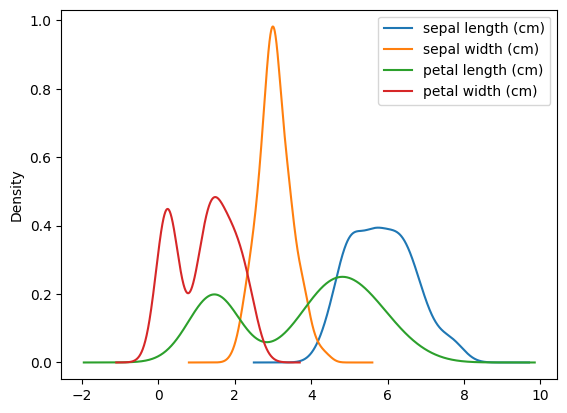

In [ ]:
iris_df.plot(kind='kde');

##### seaborn


##### t-SNE (t-Stochastic Neightbor Embedding)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Why You Are Using t-SNE Wrong - towardsdatascience](https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0)
- [How to Use t-SNE Effectively
](https://distill.pub/2016/misread-tsne/)

### üî¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (Remove Outlier)

> Ïù¥ÏÉÅÏπòÎûÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏïàÏóêÏÑú Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Í∞ÄÏßÄÎäî Í∞íÏùò Î∂ÑÌè¨ÏóêÏÑú Îß§Ïö∞ ÎèôÎñ®Ïñ¥ÏßÑ Í∞íÏùÑ Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞Î•º ÎßêÌïúÎã§. Ïù¥ÏÉÅÏπòÍ∞Ä ÏÑûÏó¨ÏûàÏúºÎ©¥ Ï∂îÌõÑ ÌïôÏäµÏóê ÏòÅÌñ•ÏùÑ Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨Îäî Ïù¥ Ïù¥ÏÉÅÏπòÍ∞Ä Îç∞Ïù¥ÌÉÄÏÖã ÏÜçÏóê ÏÑûÏó¨ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ÏïºÌïòÎ©∞ Ïù¥Î•º Ï†úÍ±∞Ìï†ÏßÄ Í≤∞Ï†ïÌï¥Ïïº ÌïúÎã§.

1. Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Detect Outlier)
2. Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (Remove Outlier)


#### 1. Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Detect Outlier)

- IQR (Interquartile Range) ÌôúÏö©
- Isolation forest

**Ï∞∏Í≥†ÏûêÎ£å**
- [Novelty and Outlier Detection - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/modules/outlier_detection.html)


##### IQR (Interquartile Range) ÌôúÏö©

- $Q_1 - 1.5\ \mathbf{IQR}\ \sim\ Q_3 + 1.5\ \mathbf{IQR}$ ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Î≤óÏñ¥ÎÇòÎäî Î™®Îì† Í∞íÏùÑ Ïù¥ÏÉÅÏπòÎùºÍ≥† Í∞ÄÏ†ïÌïòÎäî Î∞©Î≤ïÏù¥Îã§
- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) - Ïù¥ÏÉÅÏπòÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÏâΩÍ≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) - ÎçîÏö± ÏòàÏÅú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïàò ÏûàÎã§

`sepal width (cm)`ÏóêÏÑú ÏúÑ ÏïÑÎûòÎ°ú ÎÇòÌÉÄÎäî ÎèôÍ∑∏ÎùºÎØ∏Í∞Ä Î∞îÎ°ú Ïù¥ÏÉÅÏπò Í∞íÏùÑ ÎÇòÌÉÄÎÇ∏Îã§

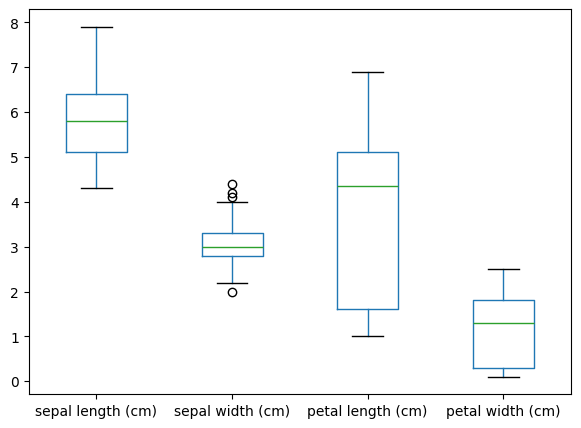

In [ ]:
# pandasÎäî Î∞îÎ°ú boxplotÏùÑ Í∑∏Î¶¥ Ïàò ÏûàÎäî Í∏∞Îä•ÏùÑ ÏßÄÏõêÌïúÎã§
iris_df.boxplot(figsize=(7, 5), grid=False);

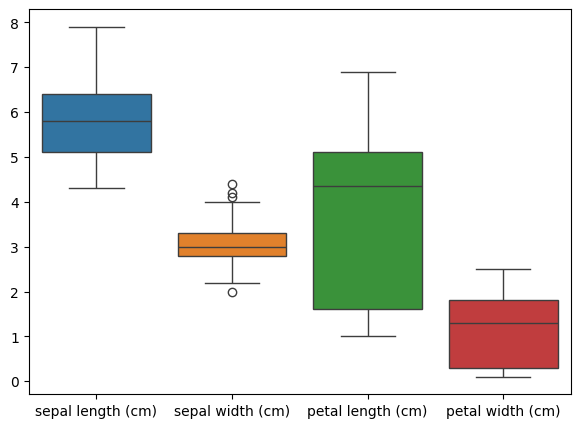

In [ ]:
# seabornÏùÑ Ïù¥Ïö©Ìï¥ ÎçîÏö± ÏòàÏÅòÍ≤å Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥Ïûê
plt.figure(figsize=(7, 5))
sns.boxplot(data=iris_df);

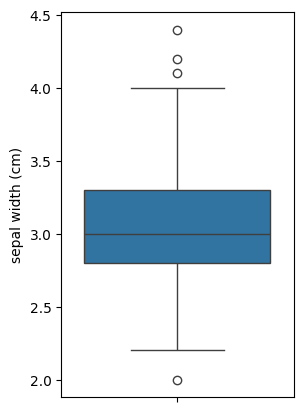

In [ ]:
# Ïù¥ÏÉÅÏπò Í∞íÏù¥ ÏûàÎäî Îã®Ïùº ÌäπÏßïÎßåÏùÑ Î≥º ÏàòÎèÑ ÏûàÎã§
plt.figure(figsize=(3, 5))
sns.boxplot(y=iris_df['sepal width (cm)']);

##### Isolation forest
- [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

#### 2. Ïù¥ÏÉÅÏ≤¥ Ï†úÍ±∞ (Remove Outlier)

> Ïù¥ÏÉÅÏπòÎùºÍ≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ ÏïàÎêúÎã§. Ïö∞Î¶¨Îäî Ïù¥ Ïù¥ÏÉÅÏπòÍ∞Ä Îã®ÏàúÌïú Ïò§Î•òÏù∏ÏßÄ ÏïÑÎãåÏßÄ Î∂ÑÏÑù ÌõÑÏóê ÎßåÏïΩ Ïù¥ÏÉÅÏπòÍ∞Ä Ïò§Î•òÍ∞Ä ÏïÑÎãàÎùºÎ©¥ Ïù¥Î•º Ï†úÍ±∞Ìï†ÏßÄ ÏïÑÎãàÎ©¥ ÎÇ®Í≤®ÎëòÏßÄ ÌîÑÎ°úÏ†ùÌä∏Ïóê Îî∞Îùº Í∏∞Ï§ÄÏùÑ ÏÑ∏Ïõå Í≤∞Ï†ïÌïòÏó¨Ïïº ÌïúÎã§.

**Ïù¥ÏÉÅÏπò Î∞úÏÉù ÏöîÏù∏Îì§**
1. Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûëÏûêÏùò Ïã§Ïàò
2. Í¥ÄÏ∏° ÏÑºÏÑú Ïò§ÏûëÎèô
3. Îç∞Ïù¥ÌÑ∞Ïùò ÏßÑÏßú ÌäπÏßï


- IQR (Interquartile Range) ÌôúÏö©

##### IQR (Interquartile Range) ÌôúÏö©

In [ ]:
Q1 = iris_df['sepal width (cm)'].quantile(0.25)
Q3 = iris_df['sepal width (cm)'].quantile(0.75)

# IQR Í≥ÑÏÇ∞ÌïòÍ∏∞
IQR = Q3 - Q1

# Ïù¥ÏÉÅÏπò Í≤ΩÍ≥ÑÏÑ† Í≥ÑÏÇ∞
low_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

low_outlier = iris_df['sepal width (cm)'] <= low_bound
upper_outlier = iris_df['sepal width (cm)'] >= upper_bound

outlier = low_outlier | upper_outlier

# Ïù¥ÏÉÅÏπò ÌëúÏãú
iris_df.loc[outlier]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

              class  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor

### üî¨ Í≤∞Ï∏°Ïπò Ï±ÑÏõåÎÑ£Í∏∞ (Fill Missing Value)

> Í≤∞Ï∏°ÏπòÎûÄ Îßê Í∑∏ÎåÄÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÏñ¥ÏûàÎäî Í≤ÉÏùÑ ÎßêÌïúÎã§. Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÏñ¥ÏûàÏúºÎ©¥ Î™®Îç∏Ïù¥ ÌïôÏäµÏùÑ Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨Îäî Ïù¥ Í≤∞Ï∏°ÏπòÏóê Í∞íÏùÑ ÎåÄÏ≤¥ÌïòÏó¨ Ï±ÑÏö∞Í±∞ÎÇò ÏïÑÏòà Ï†úÍ±∞ÌïòÏó¨Ïïº ÌïúÎã§.

1. Í≤∞Ï∏°Ïπò ÌÉêÏßÄ
2. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥ÌïòÍ∏∞ (Imputation)
3. Í≤∞Ï∏°Ïπò ÏÇ≠Ï†úÌïòÍ∏∞ (Deletion)

**Í≤∞Ï∏°Ïπò Ï¢ÖÎ•ò**
- MCAR (Missing completely at random)
- MAR (Missing at random)
- MNAR (Missing not at random)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Missing data - wikipedia](https://en.wikipedia.org/wiki/Missing_data)
- [Imputation of missing values - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî iris Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê copy()Î•º ÌÜµÌï¥ ÏÉàÎ°úÏö¥ dfÎ•º ÎßåÎì†Îã§
iris_na_df = iris_df.copy()

# ÌòÑÏû¨ iris Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê ÏùòÎèÑÏ†ÅÏúºÎ°ú Î™áÍ∞úÏùò Í≤∞Ï∏°ÏπòÎ•º ÎßåÎì§Ïûê
na_indices = [1, 5, 30, 52, 102]
iris_na_df.loc[na_indices, 'sepal length (cm)'] = np.nan

#### 1. Í≤∞Ï∏°Ïπò ÌÉêÏßÄ

> Í≤∞Ï∏°ÏπòÎ•º Ï∞æÏïÑÎÇ¥ÎäîÎç∞ Ïú†Ïö©Ìïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Í∏∞Îä•Îì§ÏùÑ ÏÜåÍ∞úÌïúÎã§

- [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
- [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- [missingno](https://github.com/ResidentMario/missingno)

##### pandas.isnull

> Í≤∞Ï∏°ÏπòÎ•º ÌÉêÏßÄÌï¥ÏÑú boolÍ∞íÏúºÎ°ú Í≤∞Í≥ºÎ•º ÎèåÎ†§Ï§ÄÎã§

ÌÉêÏßÄÌïòÎäî null Ï¢ÖÎ•ò
- None
- pd.NA
- np.nan

In [ ]:
pd.isnull(iris_df).sample(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
101              False             False              False             False   
140              False             False              False             False   
30               False             False              False             False   

     class  
101  False  
140  False  
30   False

In [ ]:
# pandas.DataFrameÏóêÏÑú Î∞îÎ°ú Ï†ÅÏö©Ìï† ÏàòÎèÑ ÏûàÎã§
iris_df.isnull().sample(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
55               False             False              False             False   
105              False             False              False             False   
114              False             False              False             False   

     class  
55   False  
105  False  
114  False

##### pandas.DataFrame.info

- `Non-Null Count`Î•º ÌÜµÌï¥ Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄÎ•º Îπ†Î•¥Í≤å ÌååÏïÖÌï† Ïàò ÏûàÎã§
- `pd.options.display.max_info_rows`Ïóê ÏßÄÏ†ïÎêú ÌñâÏùò ÏàòÎ•º Ï¥àÍ≥ºÌïòÎ©¥ `Non-Null Count`Í∞Ä ÌëúÏãúÎêòÏßÄ ÏïäÎäîÎã§. Ïù¥ÎïåÎäî ÏßÅÏ†ë Ïù¥ Í∞íÏùÑ ÏàòÏ†ïÌï¥Ï£ºÎ©¥ ÎêúÎã§.

In [ ]:
# Ïó¨Í∏∞Ïóê ÌëúÏãúÎêòÎäî Í∞íÎ≥¥Îã§ ÌñâÏùò ÏàòÍ∞Ä ÎßéÏïÑÏßÄÎ©¥ info()Îäî Non-Null CountÎ•º ÌëúÏãúÌïòÏßÄ ÏïäÎäîÎã§
pd.options.display.max_info_rows

1690785

In [ ]:
# sepal length Ï™ΩÏóê 5Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùåÏùÑ ÏÜêÏâΩÍ≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§
iris_na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### missingno

> ÌïúÎààÏóê Í≤∞Ï∏°ÏπòÎ•º ÏâΩÍ≤å ÌëúÏãúÌïòÎäî ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨Îã§

- matrix
- bar

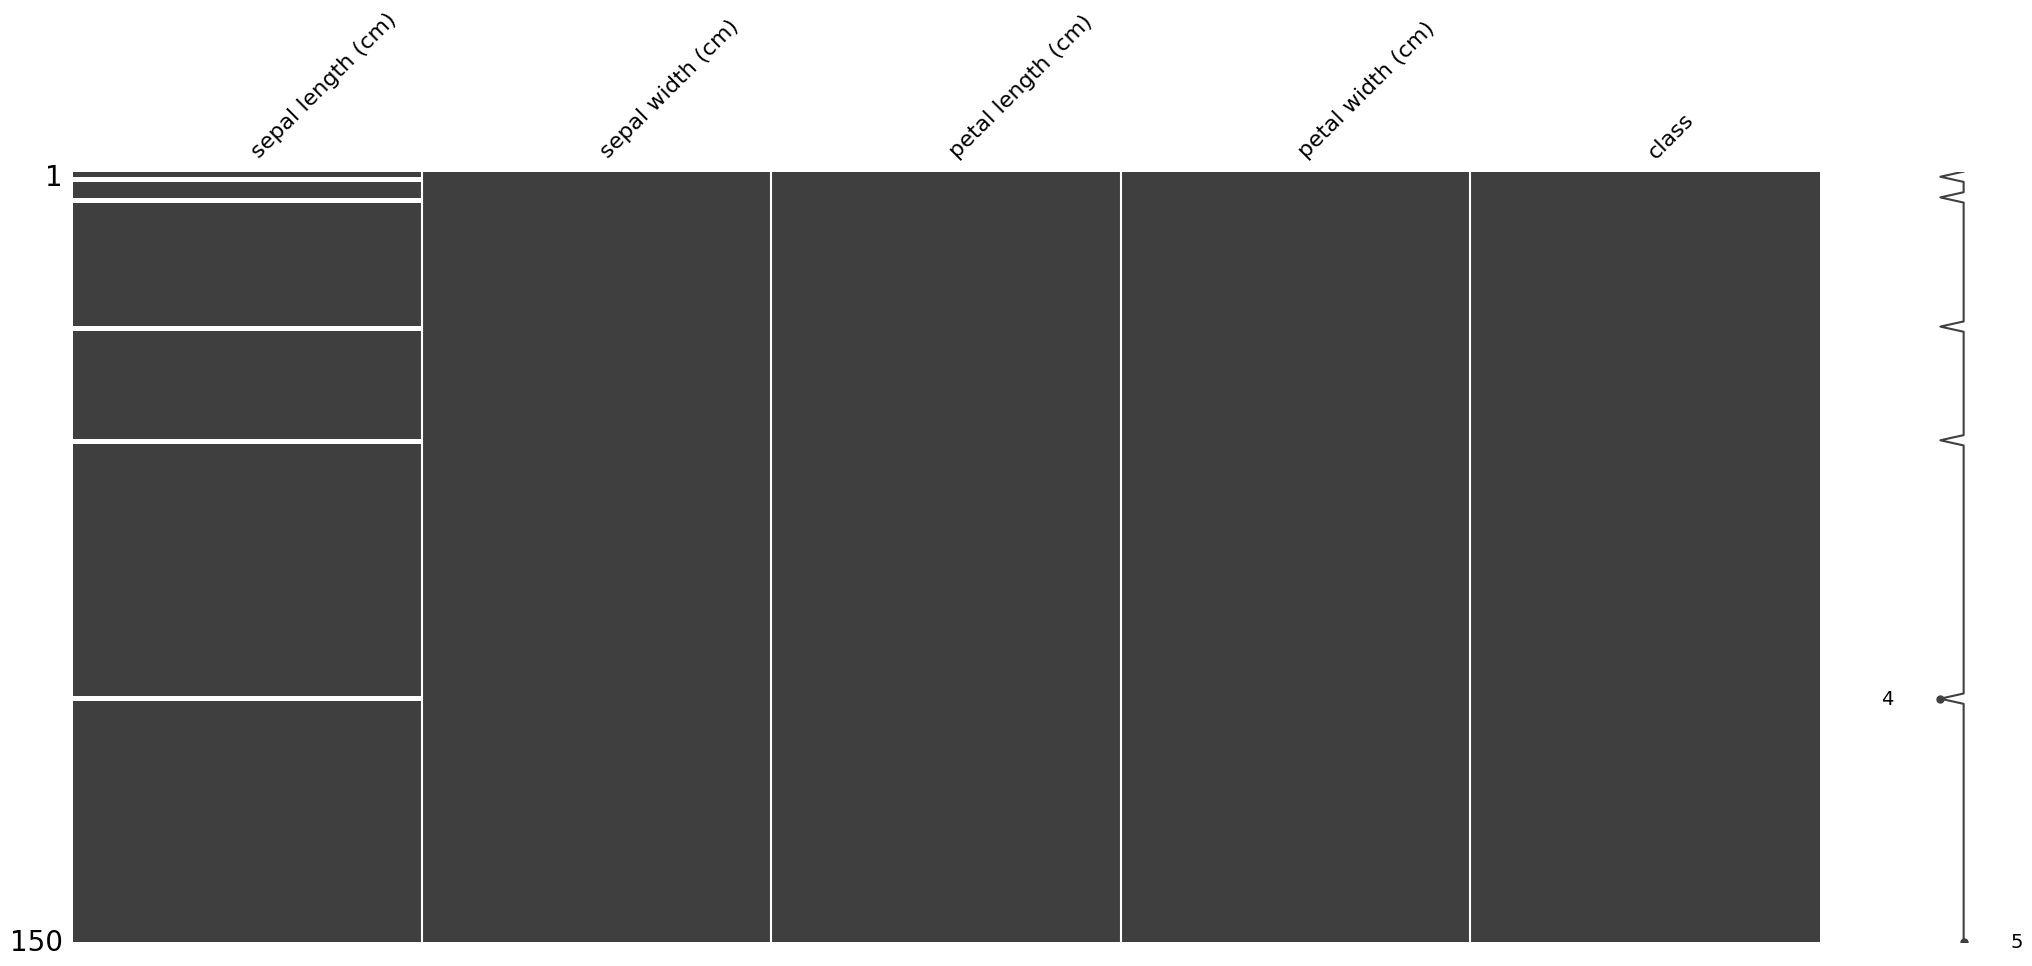

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÏùÄ Ìù∞ÏÉâ ÏÑ†ÏúºÎ°ú ÌëúÏãúÎêúÎã§
# Ïö∞Ï∏°Ïùò ÏÑ† Í∑∏ÎûòÌîÑÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏôÑÏÑ±ÎèÑÎ•º ÌëúÏãúÌïòÎ©∞ Í∞Å ÌñâÏùò ÏµúÎåÄ / ÏµúÏÜå Í≤∞Ï∏°Ïπò Í∞ØÏàòÎ•º ÌëúÏãúÌï¥Ï§ÄÎã§
missingno.matrix(iris_na_df);

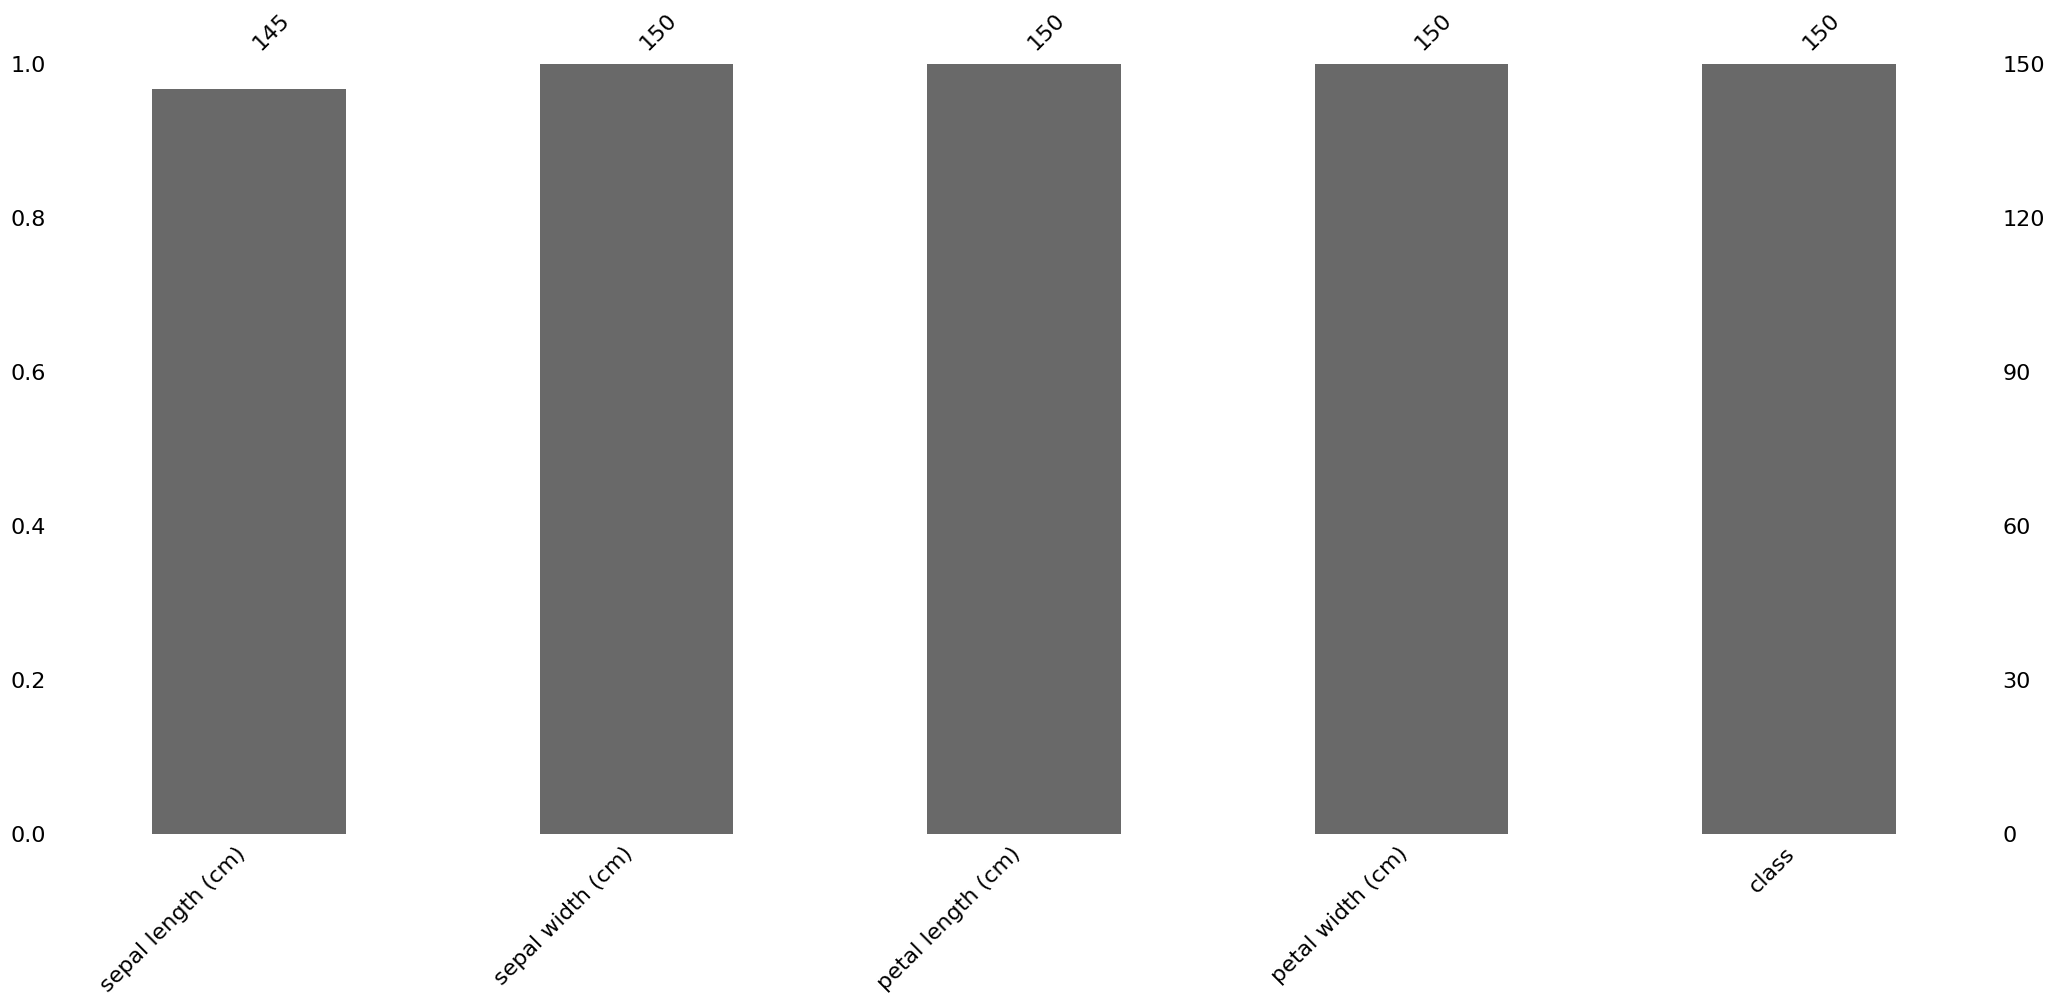

In [ ]:
missingno.bar(iris_na_df);

#### 2. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥ÌïòÍ∏∞ (Imputation)

> Í≤∞Ï∏°ÏπòÏóê ÎåÄÏ≤¥Ìï† Í∞íÏùÑ Ï†ïÌïòÎäî Î™á Í∞ÄÏßÄ Î∞©Î≤ïÎì§ÏùÑ ÏÜåÍ∞úÌïúÎã§. Ïö∞Î¶¨Îäî Í≤∞Ï∏°ÏπòÎ•º Ï†ïÌôïÌûà Ïïå Ïàò ÏóÜÏúºÎØÄÎ°ú Ï∂îÏ∏°ÏùÑ ÌÜµÌï¥ÏÑú ÎåÄÏ≤¥ Í∞íÏùÑ Ï∞æÏïÑÏïº ÌïòÎ©∞ Ïù¥Î•º ÏúÑÌï¥ ÌÜµÍ≥ÑÍ∞íÏùÑ Ïù¥Ïö©ÌïòÍ±∞ÎÇò Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìï† ÏàòÎèÑ ÏûàÎã§.

- ÌèâÍ∑† / Ï§ëÍ∞ÑÍ∞í / ÏµúÎπàÍ∞í
- Î≥¥Í∞Ñ (interpolate)
- ÌöåÍ∑Ä (regression)
- KNN

##### ÌèâÍ∑† / Ï§ëÍ∞ÑÍ∞í / ÏµúÎπàÍ∞í

> ÏßÅÍ¥ÄÏ†ÅÏù∏ Î∞©Î≤ïÏù¥Î©∞ ÏûêÏ£º ÌôúÏö©ÎêúÎã§. Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî featureÏùò ÎÇòÎ®∏ÏßÄ Í∞íÎì§Ïùò ÌÜµÍ≥ÑÍ∞íÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º ÎåÄÏ≤¥ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

- [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- **ÏµúÎπàÍ∞í**Ïùò Í≤ΩÏö∞ Ïó∞ÏÜçÌòï featureÏóêÏÑúÎäî ÌôúÏö©ÏùÑ Ï∂îÏ≤úÌïòÏßÄ ÏïäÎäîÎã§. ÎåÄÎ∂ÄÎ∂ÑÏùò Í∞íÎì§Ïù¥ Í≥†Ïú†ÌïòÍ≤å Ï°¥Ïû¨ÌïòÎØÄÎ°ú Í∞Å Í∞íÎì§Ïùò Ï∂úÌòÑ ÎπàÎèÑÍ∞Ä Î™®Îëê 1Ïù¥ ÎÇòÏò¨ ÌôïÎ•†Ïù¥ ÎÜíÏïÑ ÏµúÎπàÍ∞íÏùÑ Íµ¨ÌïòÍ∏∞Í∞Ä ÌûòÎì§Îã§

In [ ]:
# ÌèâÍ∑† (mean) / Ï§ëÍ∞ÑÍ∞í (median) / ÏµúÎπàÍ∞í(mode)
mean = iris_df['sepal length (cm)'].mean()
median = iris_df['sepal length (cm)'].median()
mode = iris_df['sepal length (cm)'].mode()

print(f'mean : {mean}, median : {median}, mode : {mode.values[0]}')

# ÌèâÍ∑†Í∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
iris_na_df['sepal length (cm)'].fillna(mean)[na_indices]

mean : 5.843333333333334, median : 5.8, mode : 5.0


1      5.843333
5      5.843333
30     5.843333
52     5.843333
102    5.843333
Name: sepal length (cm), dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# SimpleImputerÎäî numpyÎ•º Ïù¥Ïö©ÌïòÎØÄÎ°ú dfÎ•º numpyÎ°ú Î≥ÄÌôòÌïúÎã§
null_feature = iris_na_df['sepal length (cm)'].values.reshape(-1, 1)

imp_mean.fit(null_feature)
imp_mean.transform(null_feature)[na_indices]

array([[5.84413793],
       [5.84413793],
       [5.84413793],
       [5.84413793],
       [5.84413793]])

##### Î≥¥Í∞Ñ (interpolate)

> Í≤∞Ï∏°ÏπòÏùò ÏúÑ, ÏïÑÎûò Í∞íÏùÑ Í≥†Î†§ÌïòÏó¨ Í≤∞Ï∏°ÏπòÏóê Îì§Ïñ¥Í∞à Í∞íÏùÑ Ï†ïÌïòÎäî Î∞©Î≤ïÏù¥Î©∞ Îã§ÏñëÌïú Î∞©Î≤ïÎ°†Ïù¥ Ï°¥Ïû¨ÌïúÎã§

- [pandas.DataFrame.interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
s = pd.Series([0, 1, np.nan, 3])
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [ ]:
s = pd.Series([np.nan, "single_one", np.nan,
               "fill_two_more", np.nan, np.nan, np.nan,
               4.71, np.nan])

# pad Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏßÄÎßå 2Î≤àÍπåÏßÄÎßå Ï±ÑÏõåÎÑ£ÎäîÎã§
s.interpolate(method='pad', limit=2)

/var/folders/l1/t9xwrdv51cz9w5wqmx05zlr00000gn/T/ipykernel_28727/2359280229.py:6: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.interpolate(method='pad', limit=2)


0              NaN
1       single_one
2       single_one
3    fill_two_more
4    fill_two_more
5    fill_two_more
6              NaN
7             4.71
8             4.71
dtype: object

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df.interpolate(method='linear', limit_direction='forward', axis=0)

a    b    c     d
0  0.0  NaN -1.0   1.0
1  1.0  2.0 -2.0   5.0
2  2.0  3.0 -3.0   9.0
3  2.0  4.0 -4.0  16.0

##### ÌöåÍ∑Ä (regression)

> ÎßåÏïΩ Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî featureÏôÄ Îã§Î•∏ featureÎì§ ÏÇ¨Ïù¥Ïóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Î©¥ Ïö∞Î¶¨Îäî ÌöåÍ∑Ä ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©ÌïòÏó¨ÏÑú Í≤∞Ï∏°Ïπò Í∞íÏùÑ ÏòàÏ∏°Ìï¥Î≥º Ïàò ÏûàÎã§

- [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) - ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) - Ïó∞ÏÜçÌòï feature Í≤∞Ï∏°Ïπò ÏòàÏ∏°
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - Î≤îÏ£ºÌòï feature Í≤∞Ï∏°Ïπò ÏòàÏ∏°

In [ ]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
iris_na_df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî featureÍ∞Ä `ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥ (sepal length)`Ïù¥Î©∞ Îã§Î•∏ feature `ÍΩÉÏûé Í∏∏Ïù¥ (petal length)`, `ÍΩÉÏûé Ìè≠ (petal width)`ÏôÄ **Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(0.7 Ïù¥ÏÉÅ)**Í∞Ä Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú ÌöåÍ∑ÄÎ•º Ìï† Ïàò ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞, `ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥ (sepal length)`Í∞Ä **Ïó∞ÏÜçÌòï feature**Ïù¥ÎØÄÎ°ú **ÏÑ†Ìòï ÌöåÍ∑Ä (linear regression)**ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

- [ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏôÄ ÏÑ†ÌòïÌöåÍ∑Ä](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_correlation-regression/bs704_correlation-regression_print.html)

In [ ]:
# sepal length (cm)Ïùò null / non null index
null = iris_na_df['sepal length (cm)'].isnull()
not_null = ~iris_na_df['sepal length (cm)'].isnull()

# not null
x_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][not_null]
y_df = iris_na_df[['sepal length (cm)']][not_null]

# null
x_null_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][null]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_df, y_df)

# Í≤∞Ï∏°Ïπò ÏòàÏ∏°
y_predict = model.predict(x_null_df)

Í≤∞Ï∏°ÏπòÏóê ÏõêÎûò Îì§Ïñ¥ÏûàÎçò Í∞íÍ≥º ÎπÑÍµêÌïòÏó¨ Ïñ¥ÎäêÏ†ïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [ ]:
pd.DataFrame({'original': iris_df.iloc[na_indices]['sepal length (cm)'],
              'predict': y_predict.reshape(-1)})

original   predict
1         4.9  4.689357
5         5.4  5.372545
30        4.8  4.894471
52        6.9  6.503659
102       7.1  6.814286

##### KNN
- [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) - Ïó∞ÏÜçÌòï feature Í≤∞Ï∏°Ïπò ÏòàÏ∏°
- [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - Î≤îÏ£ºÌòï feature Í≤∞Ï∏°Ïπò ÏòàÏ∏°

In [ ]:
# sepal length (cm)Ïùò null / non null index
null = iris_na_df['sepal length (cm)'].isnull()
not_null = ~iris_na_df['sepal length (cm)'].isnull()

# not null
x_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][not_null]
y_df = iris_na_df[['sepal length (cm)']][not_null]

# null
x_null_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][null]

In [ ]:
# sepal length (cm)ÏùÄ Ïó∞ÏÜçÌòï featureÏù¥ÎØÄÎ°ú KNN ÌöåÍ∑Ä ÏÇ¨Ïö©
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor().fit(x_df, y_df)

# Í≤∞Ï∏°Ïπò ÏòàÏ∏°
y_predict = model.predict(x_null_df)

Í≤∞Ï∏°ÏπòÏóê ÏõêÎûò Îì§Ïñ¥ÏûàÎçò Í∞íÍ≥º ÎπÑÍµêÌïòÏó¨ Ïñ¥ÎäêÏ†ïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [ ]:
pd.DataFrame({'original': iris_df.iloc[na_indices]['sepal length (cm)'],
              'predict': y_predict.reshape(-1)})

original  predict
1         4.9     4.60
5         5.4     5.22
30        4.8     4.82
52        6.9     6.56
102       7.1     7.06

#### 3. Í≤∞Ï∏°Ïπò ÏÇ≠Ï†úÌïòÍ∏∞ (Deletion)

> Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞ÏßÄ ÏïäÍ≥† ÏÇ≠Ï†úÌïòÎäî Î∞©Î≤ïÏù¥Îã§. Ìé∏ÏùòÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Í∞Ä pandas DataFrameÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïúÎã§.

- Î™©Î°ù ÏÇ≠Ï†ú (listwise)
- Îã®ÏùºÍ∞í ÏÇ≠Ï†ú (pairwise)

##### Î™©Î°ù ÏÇ≠Ï†ú (listwise)

> DataFrameÏùò Ïñ¥Îñ§ ÌñâÏóê ÌïòÎÇòÏùò Í≤∞Ï∏°ÏπòÎùºÎèÑ Ï°¥Ïû¨ÌïòÎ©¥ Í∑∏ ÌñâÏùÑ ÏÇ≠Ï†úÌïòÎäî Î∞©Î≤ïÏù¥Îã§

- [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

```python
df.dropna()
```

In [ ]:
# Ìñâ ÏÇ≠Ï†ú - Í≤∞Ï∏°Ïπò Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎçò Ìï¥Îãπ ÌñâÎì§Ïù¥ Ï†ÑÎ∂Ä ÏÇ≠Ï†úÎêú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§
iris_na_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   class              145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


##### Îã®ÏùºÍ∞í ÏÇ≠Ï†ú (pairwise)

> Ïö∞Î¶¨Í∞Ä Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïòÍ≥†Ïûê ÌïòÎäî featureÎì§Ïóê ÌïúÏ†ïÌïòÏó¨ Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî ÌñâÏùÑ ÏÇ≠Ï†úÌïòÎäî Î∞©Î≤ïÏù¥Îã§. Ïñ¥Îñ§ featureÎì§ÏùÑ Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïòÎäêÎÉêÏóê Îî∞Îùº ÏÇ≠Ï†úÌïòÎäî ÌñâÏù¥ Îã¨ÎùºÏßà Ïàò ÏûàÎã§

- [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

```python
df.dropna(subset=[FEATURES])
```

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî featureÎì§ÎßåÏùÑ ÏÑ†ÌÉùÌï† Í≤ΩÏö∞ ÏÇ≠Ï†úÎêòÎäî ÌñâÏù¥ ÏóÜÎã§
iris_na_df.dropna(subset=['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî featureÍ∞Ä Ìè¨Ìï®Îêú Í≤ΩÏö∞ Í≤∞Ï∏°ÏπòÍ∞Ä Ìè¨Ìï®Îêú ÌñâÏùÄ Î™®Îëê ÏÇ≠Ï†úÎêúÎã§
# sepal length (cm) - Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî feature
iris_na_df.dropna(subset=['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   class              145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


### üî¨ Ìä∏ÎûúÏä§Ìèº (Transform)

> Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Î≥ÄÌôîÏãúÌÇ§Îäî Í≤ÉÏùÑ Ìä∏ÎûúÏä§ÌèºÏù¥ÎùºÍ≥† ÌïúÎã§. Ïä§ÏºÄÏùºÎßÅÏù¥ Î∂ÑÌè¨ Î≥ÄÌôî ÏóÜÏù¥ Î∂ÑÌè¨Ïùò Ïä§ÏºÄÏùºÎßå Î≥ÄÌôîÏãúÌÇ§Îäî Í≤ÉÍ≥º Îã§Î•¥Í≤å Ìä∏ÎûúÏä§ÌèºÏùÄ Î∂ÑÌè¨ ÏûêÏ≤¥Î•º Î≥ÄÌôîÏãúÌÇ®Îã§. Ìä∏ÎûúÏä§ÌèºÏùÄ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò Ìå®ÌÑ¥ÏùÑ ÎçîÏö± ÏâΩÍ≤å ÌååÏïÖÌï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ§ÄÎã§.

- Ìä∏ÎûúÏä§Ìèº (Transform) - Î∂ÑÌè¨ Î≥ÄÌôî ‚úîÔ∏è
- Ïä§ÏºÄÏùºÎßÅ (Scaling) - Î∂ÑÌè¨ Î≥ÄÌôî ‚ùå

1. Î°úÍ∑∏ (log)
2. ÏÇ¨Î∂ÑÏúÑÏàò (quantile)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Effect of transforming the targets in regression model - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html)

#### Î°úÍ∑∏ (log)

> ÌôïÎ•† Î∂ÑÌè¨Î•º Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏúºÎ°ú Î≥ÄÌôòÏùÑ ÌïòÍ≥† Ïã∂ÏùÄ featureÏóê Î°úÍ∑∏Î•º Ï∑®Ìï¥Ï£ºÎ©¥ ÎêúÎã§.

iris Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî skewed Î∂ÑÌè¨Ïùò featureÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê, sklearnÏùò `make_regression`ÏùÑ Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïúÎã§.

- [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)
- [numpy.expm1](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html) - `exp(x) - 1`
- [scipy.stats.skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [In linear regression, when is it appropriate to use the log of an independent variable instead of the actual values? - StackExchange](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va)

In [ ]:
# reference - https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
from sklearn.datasets import make_regression


# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

In [ ]:
# ÏôúÎèÑ (skew) Ï∏°Ï†ï
from scipy.stats import skew

print(f"skewed Î∂ÑÌè¨Ïùò skew : {skew(y)}, Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò skew : {skew(y_trans)}")

skewed Î∂ÑÌè¨Ïùò skew : 9.500802276118158, Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò skew : 0.0053749979998693985


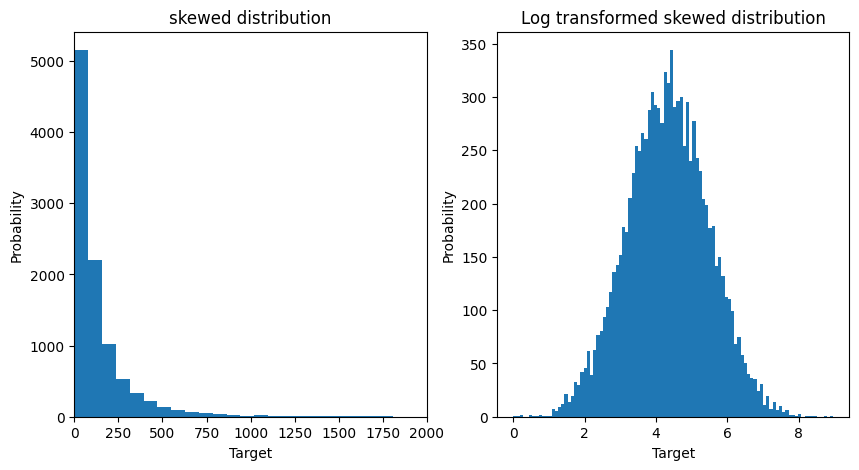

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Log transformed skewed distribution');

#### ÏÇ¨Î∂ÑÏúÑÏàò (quantile)

> Ï£ºÏñ¥ÏßÑ ÌôïÎ•†Î∂ÑÌè¨Î•º Îã§Î•∏ ÌôïÎ•†Î∂ÑÌè¨Î°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏù¥ quantile Ìä∏ÎûúÏä§ÌèºÏù¥Îã§.

- Í∑†Ïùº (uniform)
- Ï†ïÍ∑ú (normal)

‚õî **quantile transform** ÏÇ¨Ïö© Ï£ºÏùò ÏÇ¨Ìï≠
- [Warning - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html)
- Train / Test ÏÖãÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÍ∏∞ Ï†ÑÏóê Ï†ÅÏö©ÌïòÎ©¥ Data leakÍ∞Ä ÏùºÏñ¥ÎÇúÎã§. Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê Î≥ÄÌôòÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàà Ïù¥ÌõÑÏóê Ï†ÅÏö©Ìï¥Ïïº ÌïúÎã§.

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [How to Use Quantile Transforms for Machine Learning - Machine Learning Mastery](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/)

##### Í∑†Ïùº (uniform)

> ÌôïÎ•† Î∂ÑÌè¨Î•º 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Í∑†Ïùº Î∂ÑÌè¨Î°ú Î≥ÄÌôòÌïúÎã§

- [sklearn.preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

```python
QuantileTransformer(output_distribution='uniform')
```

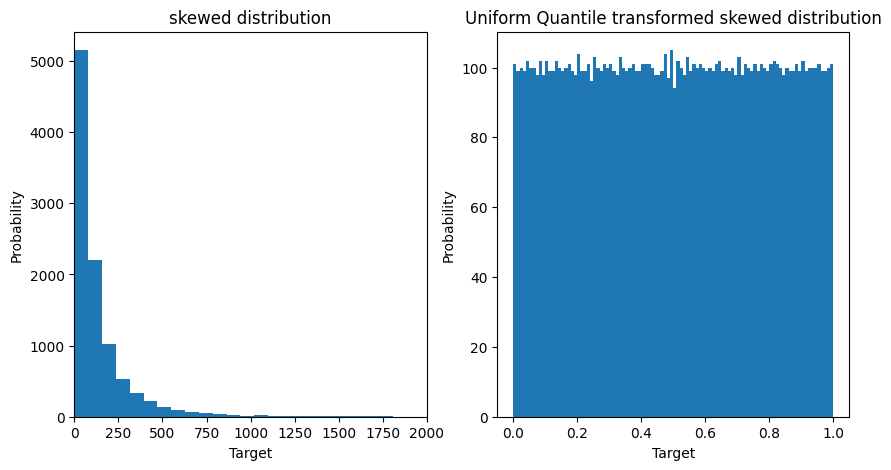

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# logÏóêÏÑú Ï†úÏûëÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïúÎã§
# Î≥ÄÌôòÏùÄ uniformÏúºÎ°ú ÏßÑÌñâÌïúÎã§
y_trans = QuantileTransformer(output_distribution='uniform').fit_transform(y.reshape(-1, 1))


# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Uniform Quantile transformed skewed distribution');

##### Ï†ïÍ∑ú (normal)

> ÌôïÎ•† Î∂ÑÌè¨Î•º Ï†ïÍ∑ú Î∂ÑÌè¨Î°ú Î≥ÄÌôòÌïúÎã§

- [sklearn.preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

```python
QuantileTransformer(output_distribution='normal')
```

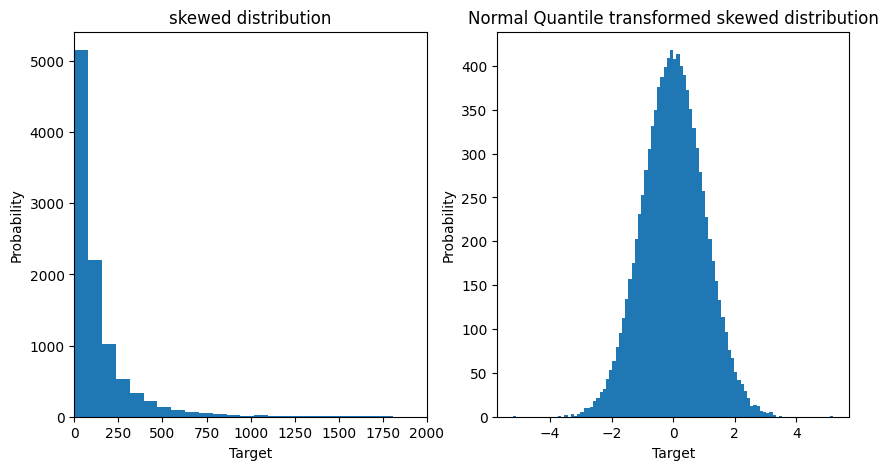

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# logÏóêÏÑú Ï†úÏûëÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïúÎã§
# Î≥ÄÌôòÏùÄ normalÏúºÎ°ú ÏßÑÌñâÌïúÎã§
y_trans = QuantileTransformer(output_distribution='normal').fit_transform(y.reshape(-1, 1))


# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Normal Quantile transformed skewed distribution');


### üî¨ Ïä§ÏºÄÏùºÎßÅ (Scaling)

> Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïùò Î≤îÏúÑÎ•º Ï°∞Ï†àÌï¥Ï§ÄÎã§. ÌöåÍ∑ÄÎÇò Îî•Îü¨ÎãùÏóêÏÑú Ïä§ÏºÄÏùºÎßÅÏùÄ Îß§Ïö∞ Ï§ëÏöîÌïú ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÎ©∞ featureÍ∞Ñ Í∞íÏùò Î≤îÏúÑÍ∞Ä Îß§Ïö∞ ÏÉÅÏù¥Ìï† Îïå Ïä§ÏºÄÏùºÎßÅÏù¥ Ïù¥Î§ÑÏßÄÏßÄ ÏïäÎäî Í≤ΩÏö∞ ÌïôÏäµÏù¥ Î∂àÏïàÏ†ïÌï¥Ïßà Ïàò ÏûàÎã§.

1. sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©ÌïòÍ∏∞

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Feature scaling - wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)
- [Feature Scaling - Why it is required? - Medium](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310)
- [Feature scaling (normalization) in multiple regression analysis with normal equation method? - stackoverflow](https://stackoverflow.com/questions/34148912/feature-scaling-normalization-in-multiple-regression-analysis-with-normal-equa)
- [Ï°∞Í±¥Ïàò (condition number) - wikipedia](https://ko.wikipedia.org/wiki/%EC%A1%B0%EA%B1%B4%EC%88%98)
- [Compare the effect of different scalers on data with outliers - sklearn Í≥µÏãùÎ¨∏ÏÑú](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

#### 1. sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©ÌïòÍ∏∞

> sklearnÏùÄ Îã§ÏñëÌïú Ï¢ÖÎ•òÏùò Ïä§ÏºÄÏùºÎßÅ Í∏∞Îä•Îì§ÏùÑ Ï†úÍ≥µÌïúÎã§.

- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [sklearn.preprocessing.MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
- [sklearn.preprocessing.Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

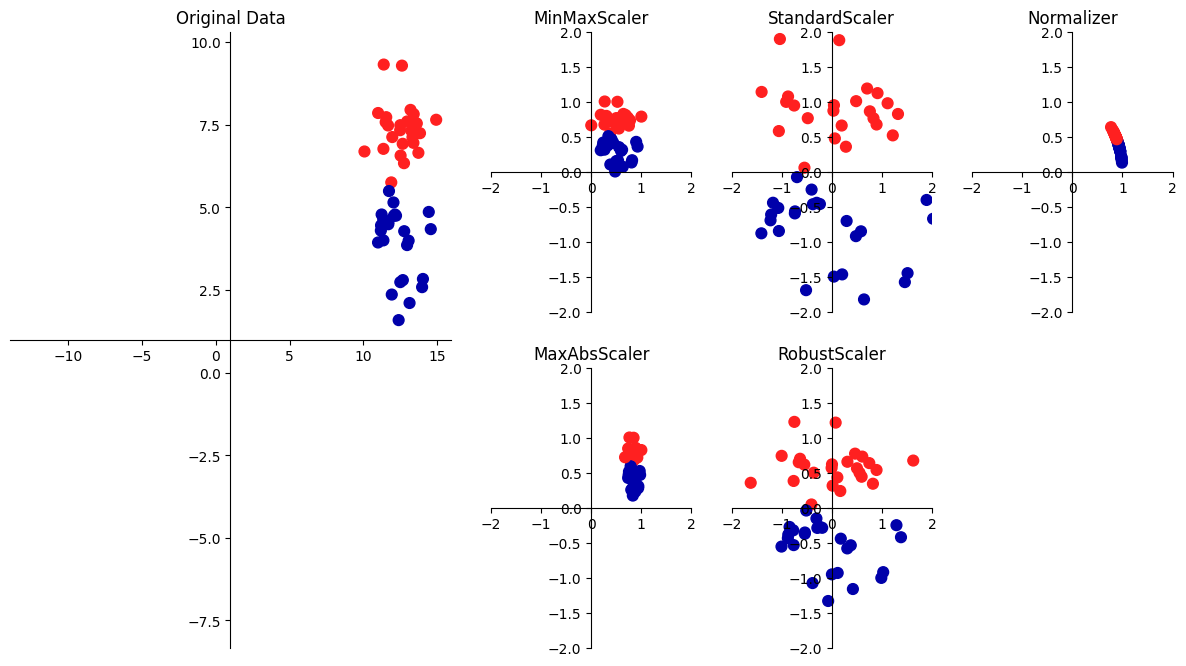

In [ ]:
#@title ##### **Ïä§ÏºÄÏùºÎßÅ(Scaling) ÏãúÍ∞ÅÌôî ÎπÑÍµê**
# reference - https://github.com/amueller/mglearn/blob/106cf48ef03710ef1402813997746741aa6467da/mglearn/plot_scaling.py#L9

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler, MaxAbsScaler)

cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 5), (0, 0), rowspan=3, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Original Data")
    other_axes = [plt.subplot2grid((2, 5), (i, j))
                  for j in range(2, 5) for i in range(2)]

    # ÎßàÏßÄÎßâ axes ÎπÑÏö∞Í∏∞
    other_axes[-1].axis('off')

    for ax, scaler in zip(other_axes, [MinMaxScaler(),
                                       MaxAbsScaler(),
                                       StandardScaler(),
                                       RobustScaler(),
                                       Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

plot_scaling()

##### Min Max Scalar

> featureÏùò Í∞íÏù¥ 0Í≥º 1 ÏÇ¨Ïù¥Ïóê ÏúÑÏπòÌïòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = MinMaxScaler().fit(X)
scaler.transform(X)

array([[0.15789474, 0.        , 0.5       , 0.04854369],
       [0.        , 0.5       , 1.        , 0.        ],
       [0.21052632, 1.        , 0.        , 0.03883495],
       [1.        , 0.75      , 0.5       , 0.03883495],
       [0.        , 0.25      , 0.42857143, 1.        ]])

##### Max Abs Scalar

> featureÏùò ÏµúÎåÄÍ∞íÏù¥ 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = MaxAbsScaler().fit(X)
scaler.transform(X)

array([[ 0.2       , -0.14285714,  0.22222222,  0.02      ],
       [ 0.05      ,  0.42857143,  1.        , -0.03      ],
       [ 0.25      ,  1.        , -0.55555556,  0.01      ],
       [ 1.        ,  0.71428571,  0.22222222,  0.01      ],
       [ 0.05      ,  0.14285714,  0.11111111,  1.        ]])

##### Standard Scalar

> featureÎ•º Ï†ïÍ∑úÌôîÌïúÎã§.

$\Large z = \frac{(x\ -\ \mu)}{\sigma}$
- $\mu$ : ÌèâÍ∑† (mean)
- $\sigma$ : ÌëúÏ§ÄÌé∏Ï∞® (standard deviation)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = StandardScaler().fit(X)
scaler.transform(X)

array([[-0.31063037, -1.41421356,  0.04499213, -0.45571832],
       [-0.73421724,  0.        ,  1.61971657, -0.58091566],
       [-0.16943475,  1.41421356, -1.52973232, -0.48075779],
       [ 1.94849961,  0.70710678,  0.04499213, -0.48075779],
       [-0.73421724, -0.70710678, -0.17996851,  1.99814957]])

##### Robust Scalar

> Standard ScalarÍ≥º ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÎèôÏûëÌûàÎ©∞ Ï§ëÍ∞ÑÍ∞í(median)Í≥º IQR(Interquartile Range)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïä§ÏºÄÏùºÎßÅÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπò(outlier)Ïóê ÏòÅÌñ•ÏùÑ Îçú Î∞õÎäîÎã§(robust).

- `Standard Scalar` : ÌèâÍ∑†(mean)Í≥º ÌëúÏ§ÄÌé∏Ï∞®(standard deviation)ÏùÑ ÏÇ¨Ïö©
- `Robust Scalar` : Ï§ëÍ∞ÑÍ∞í(median)Í≥º IQR(Interquartile Range)Î•º ÏÇ¨Ïö©

In [ ]:
from sklearn.preprocessing import RobustScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = RobustScaler().fit(X)
scaler.transform(X)

array([[ 0.  , -1.  ,  0.  ,  1.  ],
       [-0.75,  0.  ,  7.  , -4.  ],
       [ 0.25,  1.  , -7.  ,  0.  ],
       [ 4.  ,  0.5 ,  0.  ,  0.  ],
       [-0.75, -0.5 , -1.  , 99.  ]])

##### Normalizer

> ÏúÑÏùò Ïä§ÏºÄÏùºÎßÅ Í∏∞Î≤ïÎì§Í≥º Îã§Î•¥Í≤å Í∞ÅÍ∞ÅÏùò **featureÏóê Í∞úÎ≥ÑÎ°ú Ï†ÅÏö©ÎêòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº** Î™®Îì† **ÌäπÏßï Î≤°ÌÑ∞(feature vector)Îì§ÏóêÍ≤å Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Ï†ÅÏö©**ÎêúÎã§. pandas DataFrame Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Î™ÖÌïòÎ©¥ Ïó¥Ïóê Ï†ÅÏö©ÎêòÎçò Ïä§ÏºÄÏùºÎßÅ Í∏∞Î≤ïÏù¥ ÌñâÏóê Ï†ÅÏö©ÎêòÎäî ÏÖàÏù¥Îã§. **ÌäπÏßï Î≤°ÌÑ∞(feature vector)**Ïùò normÏù¥ Î™®Îëê 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅÌïòÎ©∞ **ÌäπÏßï Î≤°ÌÑ∞(feature vector)**Ïùò Í∏∏Ïù¥Îäî Ïã†Í≤ΩÏì∞ÏßÄ ÏïäÍ≥† Î∞©Ìñ• ÌòπÏùÄ Í∞ÅÎèÑÍ∞Ä Ï§ëÏöîÌï† Îïå ÏÇ¨Ïö©ÎêúÎã§.

In [ ]:
from sklearn.preprocessing import Normalizer

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = Normalizer().fit(X)
scaler.transform(X)

array([[ 0.8       , -0.2       ,  0.4       ,  0.4       ],
       [ 0.1       ,  0.3       ,  0.9       , -0.3       ],
       [ 0.5       ,  0.7       , -0.5       ,  0.1       ],
       [ 0.96448564,  0.24112141,  0.09644856,  0.04822428],
       [ 0.0099985 ,  0.0099985 ,  0.0099985 ,  0.99985003]])

## üß™ Ïù∏ÏΩîÎî© (Encoding)
- ÏàúÏÑú Ïù∏ÏΩîÎî© (Ordinal Encoding)
- ÎùºÎ≤® Ïù∏ÏΩîÎî© (Label Encoding)
- ÏõêÌï´ Ïù∏ÏΩîÎî© (One Hot Encoding)
- ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© (Target Encoding)

**Ïù∏ÏΩîÎî©(Encoding)ÏùÄ featureÍ∞Ä Î≤îÏ£ºÌòï(Category)Ïùº Îïå Ï†ÅÏö©ÌïòÎ©∞ Î≤îÏ£ºÌòïÏùÑ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏùÑ ÎßêÌïúÎã§**
> Ïö∞Î¶¨Îäî **Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Ìï¥ÌïòÍ∏∞**ÏóêÏÑú Í∞Å featureÍ∞Ä Î≤îÏ£ºÌòïÏù∏ÏßÄ ÏàòÏπòÌòïÏù∏ÏßÄ ÏïåÏïÑÎ≥¥ÏïòÎã§. iris Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÏö∞Îäî Î™®Îì† featureÍ∞Ä Ïó∞ÏÜçÌòïÏù¥ÏóàÏßÄÎßå, ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Î≤îÏ£ºÌòï featureÎ•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§.

- Ïù∏ÏΩîÎî©(Encoding)ÏùÄ Ï§ëÏöîÌïú ÏöîÏÜåÎäî ÏïÑÎãàÎã§. Ïù∏ÏΩîÎî©(Encoding)ÏóêÏÑúÎäî ÏÑ±Îä• Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÏßÄÎäî ÏïäÎäîÎã§. ÎßåÏïΩ ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏Ïù¥ Ìä∏Î¶¨(Tree) Î™®Îç∏Ïù¥Î©¥ ÎçîÏö± ÏÉÅÍ¥ÄÏóÜÏúºÎ©∞ ÏàúÏÑú Ïù∏ÏΩîÎî©(Ordinal Encoding)Îßå Ìï¥ÎèÑ Ï∂©Î∂ÑÌïòÎã§. Îã§Îßå Ïù∏ÏΩîÎî© ÌïòÎäî featureÏùò cardinalityÍ∞Ä Ïª§ÏßàÍ≤ΩÏö∞ Ïù∏ÏΩîÎî©Ïóê Îî∞Îùº Ìä∏Î¶¨(Tree)Î™®Îç∏ÏóêÏÑúÏùò ÏÑ±Îä• Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ Î≤åÏñ¥ÏßÄÎØÄÎ°ú Ïã†Ï§ëÌûà ÏÑ†ÌÉùÌïòÏó¨Ïïº ÌïúÎã§.

‚≠ê **Ïù∏ÏΩîÎî© Ï¢ÖÎ•òÏùò Îã§ÏñëÏÑ±** ‚≠ê
> Ïã§Ï†ÑÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî Ïù∏ÏΩîÎî©(Encoding) Î∞©Î≤ïÎì§ÏùÑ ÏÜåÍ∞úÌïòÏòÄÏßÄÎßå Ïã§Ï†ú Ïù∏ÏΩîÎî© Î∞©Î≤ïÏùÄ Îçî Îã§ÏñëÌïòÎã§. Í¥ÄÏã¨Ïù¥ ÏûàÎã§Î©¥ **Ïú†Ïö©Ìïú ÏûêÎ£å**Ïùò Ï≤´ Î≤àÏß∏ Í∏Ä ÌòπÏùÄ `category_encoders` ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Í≥µÏãù Î¨∏ÏÑúÎ•º Ï∞∏Ï°∞ÌïòÏûê
- [Category Encoders Í≥µÏãùÎ¨∏ÏÑú](https://contrib.scikit-learn.org/category_encoders/#)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [All about Categorical Variable Encoding - towardsdatascience](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
- [Why decision tree needs categorical variable to be encoded? - StackExchange](https://datascience.stackexchange.com/questions/52066/why-decision-tree-needs-categorical-variable-to-be-encoded)
- [One-Hot Encoding is making your Tree-Based Ensembles worse, here‚Äôs why? - towardsdatascience](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)
- [Visiting: Categorical Features and Encoding in Decision Trees - Medium](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)

In [ ]:
# Ïã§ÏäµÏùÑ ÏúÑÌïú Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞
duck_df = pd.DataFrame({'type': ['goose', 'duck', 'goose', 'duck', 'duck', 'duck'],
                        'color': ['red', 'green', 'blue', 'green', 'green', 'red'],
                        'smartness': ['A', 'C', 'B', 'C', 'A', 'A']})
duck_df

type  color smartness
0  goose    red         A
1   duck  green         C
2  goose   blue         B
3   duck  green         C
4   duck  green         A
5   duck    red         A


### ‚öóÔ∏è ÏàúÏÑú Ïù∏ÏΩîÎî© (Ordinal Encoding)

> Ïù∏ÏΩîÎî©ÌïòÎäî featureÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Îì§ÏùÑ ÎÇòÌÉÄÎÇòÎäî ÏàúÏÑúÎåÄÎ°ú 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎäî Ïà´Ïûê Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî©ÌïúÎã§. Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê Ïù∏ÏΩîÎî©Ìï† Ïà´ÏûêÎäî ÏßÅÏ†ë ÏßÄÏ†ïÌï† Ïàò ÏûàÎã§. ÏàúÏÑúÎ•º Í∞ÄÏßÑ Ïà´ÏûêÎ°ú Ïù∏ÏΩîÎî©ÎêòÎäî ÎßåÌÅº Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞ÑÏóê Ïó∞Í¥ÄÎêòÎØÄÎ°ú ÏàúÏÑúÌòï(Oridinal)Ïùº Í≤ΩÏö∞ ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§.

- Îã§ÏàòÏùò featureÎì§ÏùÑ ÌïúÎ≤àÏóê Ïù∏ÏΩîÎî© Ìï† Ïàò ÏûàÎã§.
- Ìä∏Î¶¨(Tree) Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî Î™ÖÎ™©Ìòï(Nominal)Ïù∏ Í≤ΩÏö∞ÏóêÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

1. Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò ÏàúÏÑúÎ•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞
2. Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò ÏàúÏÑúÎ•º ÏßÄÏ†ïÌï† Í≤ΩÏö∞

- [sklearn.preprocessing.OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
    

#### 1. Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò ÏàúÏÑúÎ•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞
```python
OrdinalEncoder()
```

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

X = duck_df.smartness.values.reshape(-1, 1)
print(X)

enc = OrdinalEncoder()
enc.fit(X)
enc.transform(X)

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.]])

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏù∏
enc.categories_

[array(['A', 'B', 'C'], dtype=object)]

#### 2. Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò ÏàúÏÑúÎ•º ÏßÄÏ†ïÌï† Í≤ΩÏö∞
```python
OrdinalEncoder(categories=[['C', 'B', 'A']])
```

In [ ]:
print(X)

enc = OrdinalEncoder(categories=[['C', 'B', 'A']])
enc.fit(X)
enc.transform(X)

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.]])

In [ ]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏù∏
enc.categories_

[array(['C', 'B', 'A'], dtype=object)]


### ‚öóÔ∏è ÎùºÎ≤® Ïù∏ÏΩîÎî© (Label Encoding)

> ÏàúÏÑú Ïù∏ÏΩîÎî© (Ordinal Encoding)Í≥º Î∞©ÏãùÏùÄ ÎèôÏùºÌïòÏßÄÎßå ÌïúÍ∞úÏùò featureÏóêÎßå Ï†ÅÏö© Í∞ÄÎä•ÌïòÎ©∞ target(Y)Ïóê Ï†ÅÏö©Ìï† Î™©Ï†ÅÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.

- `ÏàúÏÑú Ïù∏ÏΩîÎî© (Ordinal Encoding)`
    - input(X)Ïóê Ï†ÅÏö©
    - Îã§ÏàòÏùò featureÎì§ÏùÑ ÎèôÏãúÏóê Ïù∏ÏΩîÎî©
    - ÏàúÏÑú ÏßÄÏ†ï Í∞ÄÎä•
- `ÎùºÎ≤® Ïù∏ÏΩîÎî© (Label Encoding)`
    - target(Y)Ïóê Ï†ÅÏö©
    - ÌïúÍ∞úÏùò featureÎßå Ïù∏ÏΩîÎî©
    - ÏàúÏÑú ÏßÄÏ†ï Î∂àÍ∞ÄÎä•

‚õî input(X)Ïùò feature Í∞ÅÍ∞ÅÏùÑ ÏàúÏÑú ÏßÄÏ†ï ÏóÜÏù¥ Ïù∏ÏΩîÎî© Ìï† Í≤ΩÏö∞ ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)ÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©ÌïòÎÇò sklearnÏùÄ target(Y)Ïù¥ ÏïÑÎãå input(X)Ïóê Ï†ÅÏö©ÌïòÎäî Í≤ÉÏùÑ Í∂åÏû•ÌïòÏßÄ ÏïäÎäîÎã§.

- [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = duck_df.type
print(X)

enc = LabelEncoder()
enc.fit(X)
enc.transform(X)

0    goose
1     duck
2    goose
3     duck
4     duck
5     duck
Name: type, dtype: object


array([1, 0, 1, 0, 0, 0])

### ‚öóÔ∏è ÏõêÌï´ Ïù∏ÏΩîÎî© (One Hot Encoding)

> featureÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Î≤°ÌÑ∞Î°ú Ïù∏ÏΩîÎî©ÌïúÎã§. Ïù¥ Î≤°ÌÑ∞Ïùò Í∏∏Ïù¥Îäî Ïπ¥ÌÖåÍ≥†Î¶¨ ÏàòÏù¥Îã§.

- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = duck_df.smartness.values.reshape(-1, 1)
print(X)

enc = OneHotEncoder()
enc.fit(X)
enc.transform(X).toarray()

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

### ‚öóÔ∏è ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© (Target Encoding)

> **ÌèâÍ∑† Ïù∏ÏΩîÎî© (Mean Encoding)**Ïù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶∞Îã§. featureÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ìï¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò targetÍ∞íÏùò ÌèâÍ∑†ÏúºÎ°ú Ïù∏ÏΩîÎî©ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.

1. ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© (Target Encoding) ÏÇ¨Ïö©
2. Smoothing

- [category_encoders.target_encoder.TargetEncoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)

**Ïú†Ïö©Ìïú ÏûêÎ£å**
- [Mean (likelihood) encodings: a comprehensive study - Kaggle](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)

#### 1. ÌÉÄÍ≤ü Ïù∏ÏΩîÎî© (Target Encoding) ÏÇ¨Ïö©

> `category_encoders` ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÏó¨ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©ÏùÑ Ìï¥Î≥¥Ïûê. `type`ÏùÑ targetÏúºÎ°ú Í∞ÄÏ†ïÌïúÎã§.

‚õî Ï£ºÏùòÏÇ¨Ìï≠ ‚õî
- Train ÏÖãÏóê OverfittingÎê† Ïàò ÏûàÎã§
- Train ÏÖãÍ≥º Test ÏÖãÏùò labelÍ∞í Î∂ÑÌè¨Í∞Ä ÏÉÅÏù¥ÌïòÎ©¥ Î¨∏Ï†úÍ∞Ä ÎêúÎã§

In [ ]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Target EncodingÏùÄ targetÏùò Í∞íÏù¥ Ïà´ÏûêÏó¨Ïïº ÌïòÎØÄÎ°ú ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÑ ÌïúÎã§
X = duck_df[['color', 'smartness']]
y = LabelEncoder().fit_transform(duck_df[['type']].values.ravel())

duck_df['target'] = y
duck_df

type  color smartness  target
0  goose    red         A       1
1   duck  green         C       0
2  goose   blue         B       1
3   duck  green         C       0
4   duck  green         A       0
5   duck    red         A       0

In [ ]:
enc = TargetEncoder()
enc.fit(X, y)
enc.transform(X)

color  smartness
0  0.356975   0.333333
1  0.281845   0.286050
2  0.420072   0.420072
3  0.281845   0.286050
4  0.281845   0.333333
5  0.356975   0.333333

#### 2. Smoothing

>  ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©Ïùò overfittingÏùÑ ÏôÑÌôîÏãúÌÇ§Í≥†Ïûê Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò target ÌèâÍ∑†Í∞íÏùÑ Ï†ÑÏ≤¥ target ÌèâÍ∑†Í∞íÏúºÎ°ú Ïù¥ÎèôÏãúÌÇ§Îäî Î∞©Î≤ïÏù¥Îã§.

- Ïù∏ÌÑ∞ÎÑ∑ ÏÉÅÏóê ÏïåÎ†§ÏßÑ smoothing
- **category_encoders** ÎùºÏù¥Î∏åÎü¨Î¶¨ smoothing


##### Ïù∏ÌÑ∞ÎÑ∑ ÏÉÅÏóê ÏïåÎ†§ÏßÑ smoothing

$\large \mathbb{smoothing}_c = \frac{(mean_c\ \times\ n_c\ +\ global\_mean\ \times\ \alpha)}{n_c\ +\ \alpha}$
- $mean_c$ : Ïπ¥ÌÖåÍ≥†Î¶¨ cÏóê ÏÜçÌïòÎäî targetÏùò ÌèâÍ∑†Í∞í
- $n_c$ : Ïπ¥ÌÖåÍ≥†Î¶¨ cÏùò Ìñâ Ïàò
- $global\_mean$ : Ï†ÑÏ≤¥ targetÏùò ÌèâÍ∑†Í∞í
- $\alpha$ : hyperparameterÎ°ú defaultÎäî 1Ïù¥Î©∞ Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù Ï†ÑÏ≤¥ target ÌèâÍ∑†Ïóê Í∞ÄÍπåÏõåÏßÑÎã§

**Ï∞∏Í≥†ÏûêÎ£å**
- [Target encoding done the right way - Blog](https://maxhalford.github.io/blog/target-encoding/)

In [ ]:
def smoothing_internet(mean_c, n_c, global_mean, alpha):
    return (mean_c*n_c + global_mean*alpha)/(n_c + alpha)

In [ ]:
# global mean
global_mean = duck_df.target.mean()

# smartnessÏùò mean_cÏôÄ n_c
agg = duck_df.groupby('smartness')['target'].agg(['count', 'mean'])
n_c = agg['count']
mean_c = agg['mean']

print(n_c, mean_c)
print(global_mean)

smartness
A    3
B    1
C    2
Name: count, dtype: int64 smartness
A    0.333333
B    1.000000
C    0.000000
Name: mean, dtype: float64
0.3333333333333333


In [ ]:
print(smoothing_internet(mean_c, n_c, global_mean, 1))

smartness
A    0.333333
B    0.666667
C    0.111111
dtype: float64


##### **category_encoders** ÎùºÏù¥Î∏åÎü¨Î¶¨ smoothing
> ÏïåÎ†§ÏßÑ smoothÌïòÍ≥† Îã§Î•¥Í≤å `category_encoders`ÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî smooth Î∞©Î≤ïÏùÄ Îã§Î•¥Îã§.

**Ï∞∏Í≥†ÏûêÎ£å**
- [target_encoder.py - Github](https://github.com/scikit-learn-contrib/category_encoders/blob/master/category_encoders/target_encoder.py)

In [ ]:
def smoothing(mean_c, n_c, global_mean, alpha):
    # default
    min_samples_leaf = 1

    smoove = 1 / (1 + np.exp(-(n_c - min_samples_leaf) / alpha))
    smoothing = global_mean * (1 - smoove) + mean_c * smoove
    smoothing[n_c == 1] = global_mean

    return smoothing

In [ ]:
print(smoothing(mean_c, n_c, global_mean, 1))

smartness
A    0.333333
B    0.333333
C    0.089647
dtype: float64


###**ÏΩòÌÖêÏ∏† ÎùºÏù¥ÏÑ†Ïä§**

<font color='red'><b>**WARNING**</b></font> : **Î≥∏ ÍµêÏú° ÏΩòÌÖêÏ∏†Ïùò ÏßÄÏãùÏû¨ÏÇ∞Í∂åÏùÄ Ïû¨Îã®Î≤ïÏù∏ ÎÑ§Ïù¥Î≤ÑÏª§ÎÑ•Ìä∏Ïóê Í∑ÄÏÜçÎê©ÎãàÎã§. Î≥∏ ÏΩòÌÖêÏ∏†Î•º Ïñ¥Îñ†Ìïú Í≤ΩÎ°úÎ°úÎì† Ïô∏Î∂ÄÎ°ú Ïú†Ï∂ú Î∞è ÏàòÏ†ïÌïòÎäî ÌñâÏúÑÎ•º ÏóÑÍ≤©Ìûà Í∏àÌï©ÎãàÎã§.** Îã§Îßå, ÎπÑÏòÅÎ¶¨Ï†Å ÍµêÏú° Î∞è Ïó∞Íµ¨ÌôúÎèôÏóê ÌïúÏ†ïÎêòÏñ¥ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎÇò Ïû¨Îã®Ïùò ÌóàÎùΩÏùÑ Î∞õÏïÑÏïº Ìï©ÎãàÎã§. Ïù¥Î•º ÏúÑÎ∞òÌïòÎäî Í≤ΩÏö∞, Í¥ÄÎ†® Î≤ïÎ•†Ïóê Îî∞Îùº Ï±ÖÏûÑÏùÑ Ïßà Ïàò ÏûàÏäµÎãàÎã§.

